<a href="https://colab.research.google.com/github/Berchie-Sam/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
# importing the necessary libraries or packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from google.colab import drive

In [78]:
data = pd.read_csv('/content/drive/MyDrive/unemployment_data.csv')

Exploratory Data Analysis (EDA)

In [79]:
# Display the first few rows of the DataFrame
print(data.head())

        week  acceptance letter  american lottery  application for employment  \
0   1/3/2010                  0                17                           0   
1  1/10/2010                  0                 0                          35   
2  1/17/2010                  0                34                           0   
3  1/24/2010                 45                 0                           0   
4  1/31/2010                  0                 0                           0   

   application letter  Business opportunities  career  companies in ghana  \
0                  51                      38      80                  44   
1                  17                       0      31                  53   
2                  17                       0      16                  54   
3                  31                       0      87                  80   
4                  15                      32      14                  57   

   cover letter  Curriculum vitae  ...  trade  tra

In [80]:
# Display basic information about the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   week                        574 non-null    object 
 1   acceptance letter           574 non-null    int64  
 2   american lottery            574 non-null    int64  
 3   application for employment  574 non-null    int64  
 4   application letter          574 non-null    int64  
 5   Business opportunities      574 non-null    int64  
 6   career                      574 non-null    int64  
 7   companies in ghana          574 non-null    int64  
 8   cover letter                574 non-null    int64  
 9   Curriculum vitae            574 non-null    int64  
 10  cv                          574 non-null    int64  
 11  Distance education          574 non-null    int64  
 12  distance learning           574 non-null    int64  
 13  employment letter           574 non

In [81]:
# Display summary statistics of numerical columns
print(data.describe())

       acceptance letter  american lottery  application for employment  \
count         574.000000        574.000000                  574.000000   
mean           38.869338         26.212544                   46.445993   
std            25.166364         22.878924                   23.427949   
min             0.000000          0.000000                    0.000000   
25%            21.250000         11.000000                   31.000000   
50%            35.000000         19.000000                   45.000000   
75%            54.000000         33.000000                   62.000000   
max           100.000000        100.000000                  100.000000   

       application letter  Business opportunities      career  \
count          574.000000              574.000000  574.000000   
mean            56.533101               32.247387   50.463415   
std             20.450292               24.809743   21.541013   
min              0.000000                0.000000    0.000000   
25%     

In [82]:
data.isnull().any() # checking for null values column-wise

week                          False
acceptance letter             False
american lottery              False
application for employment    False
application letter            False
Business opportunities        False
career                        False
companies in ghana            False
cover letter                  False
Curriculum vitae              False
cv                            False
Distance education            False
distance learning             False
employment letter             False
employment                    False
entrepreneur                  False
Exchange rate                 False
Foreign Exchange              False
ghana economy                 False
ghana jobs                    False
graduate                      False
graduation                    False
health insurance              False
how to make money             False
how to start a business       False
income tax                    False
job application               False
job interview               

In [83]:
data.isnull().any(axis=1) # checking for null values row-wise

0      False
1      False
2      False
3      False
4      False
       ...  
569    False
570    False
571    False
572    False
573    False
Length: 574, dtype: bool

In [84]:
def plot_boxplot(data, column):
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [85]:
def plot_distribution_plot(data, column):
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution Plot for {column}')
    plt.show()

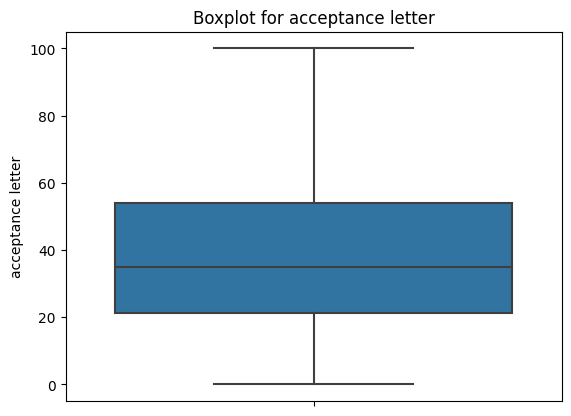

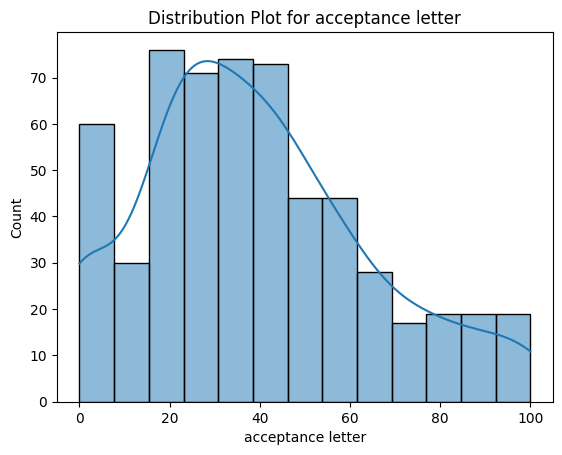

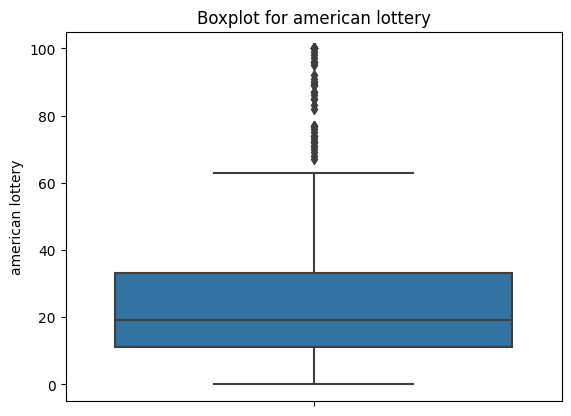

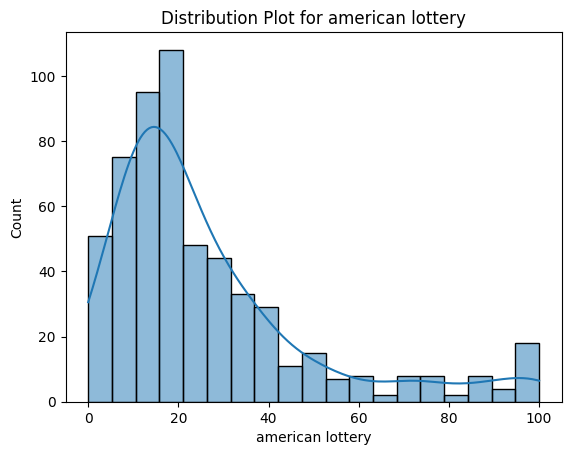

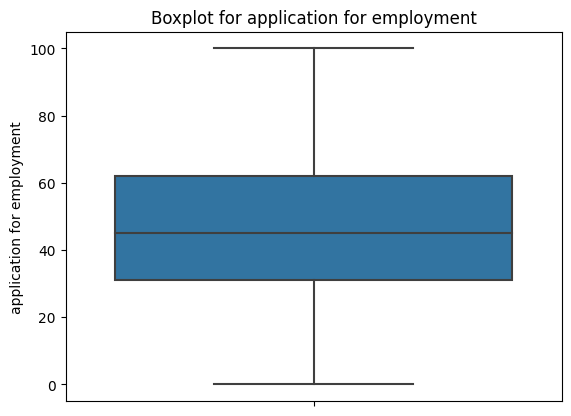

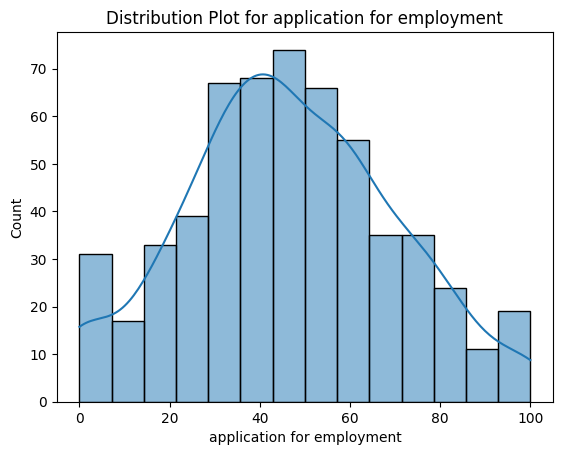

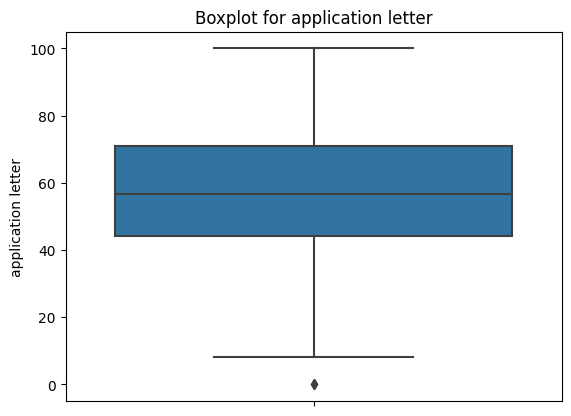

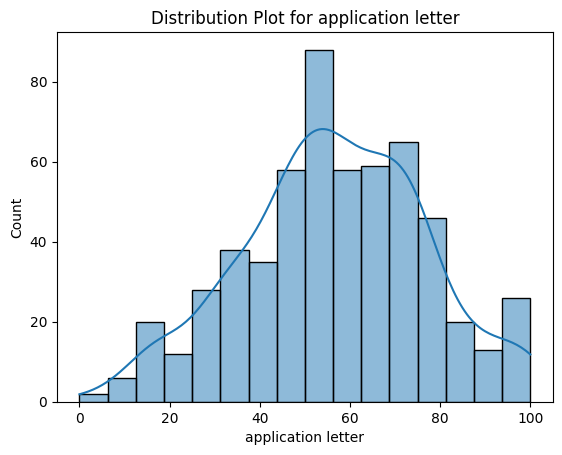

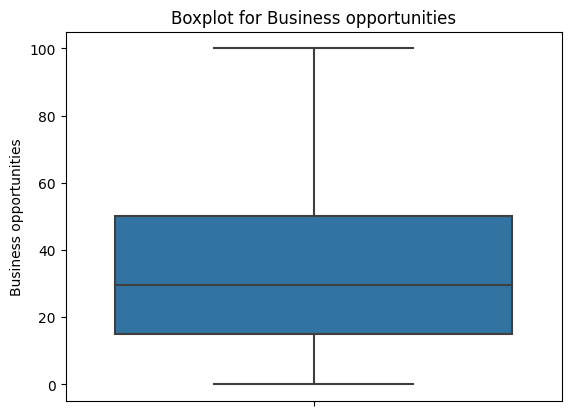

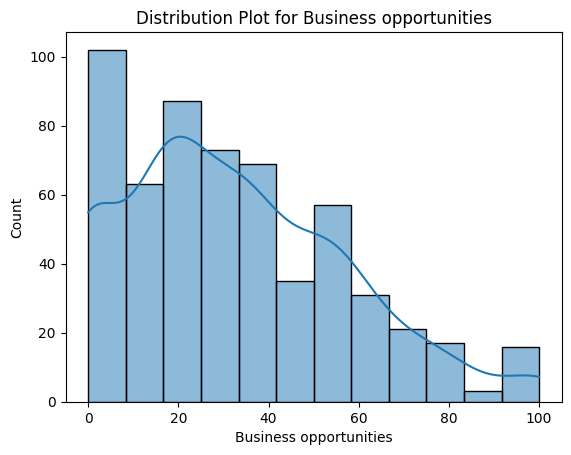

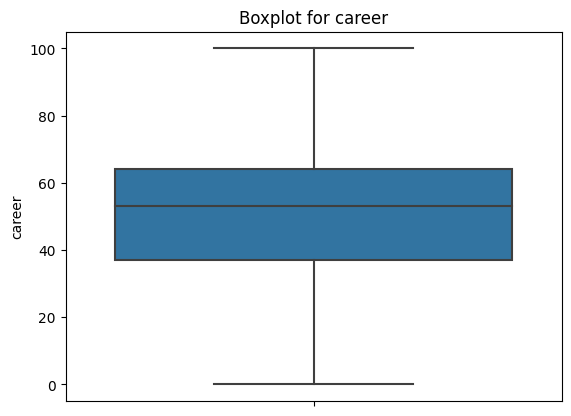

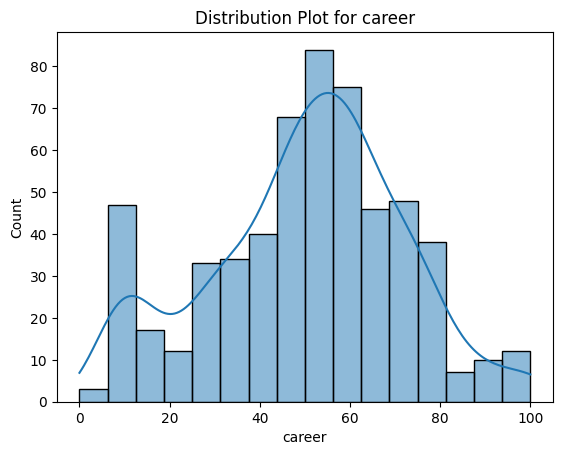

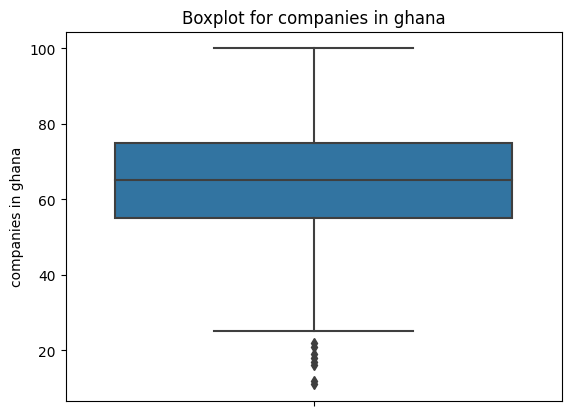

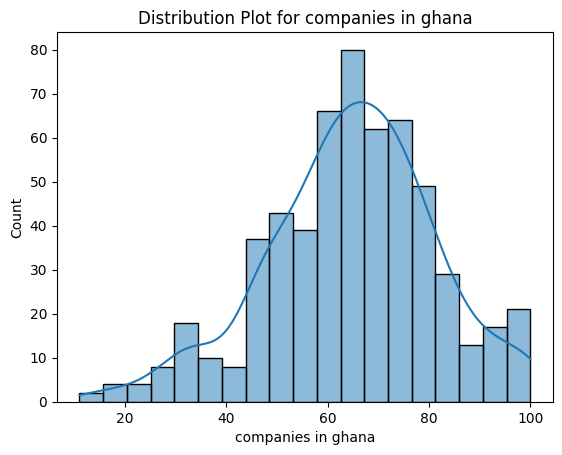

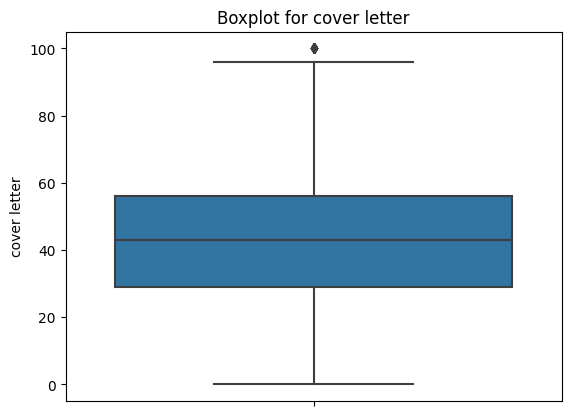

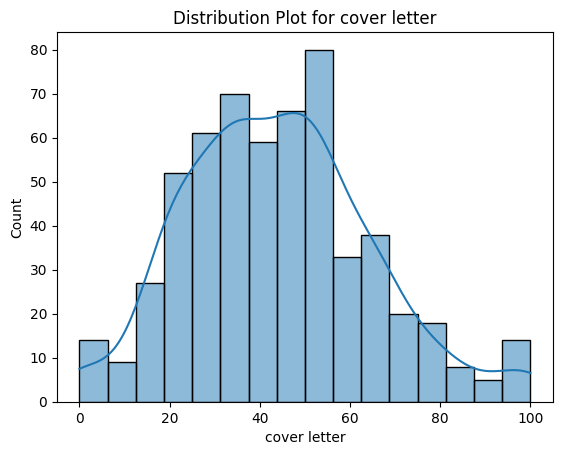

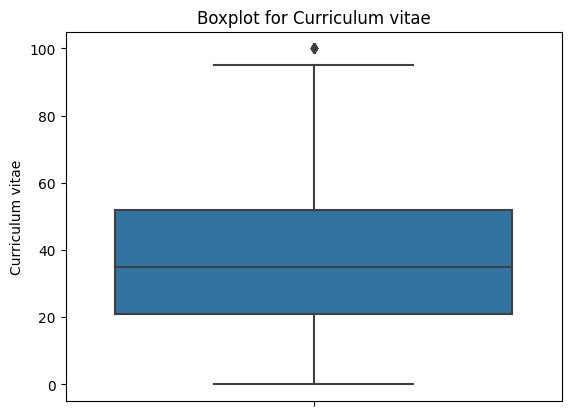

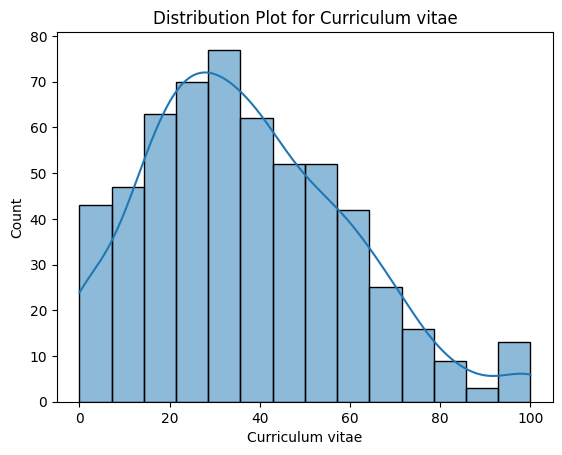

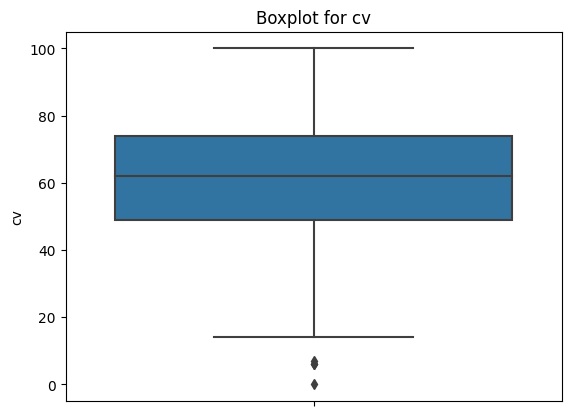

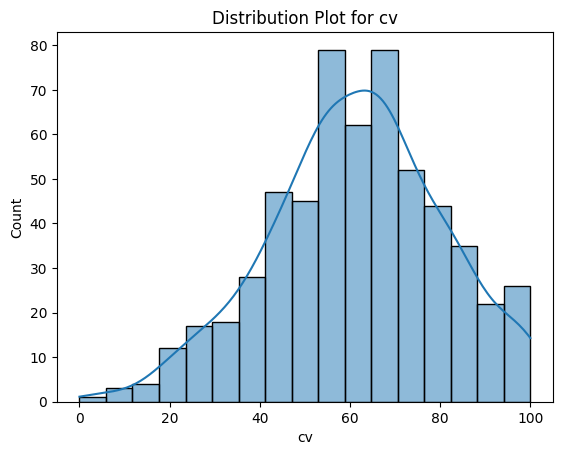

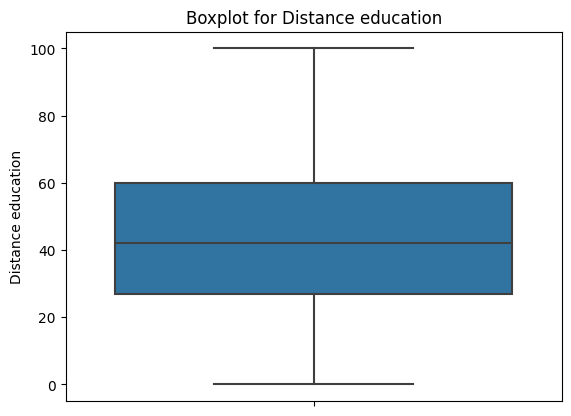

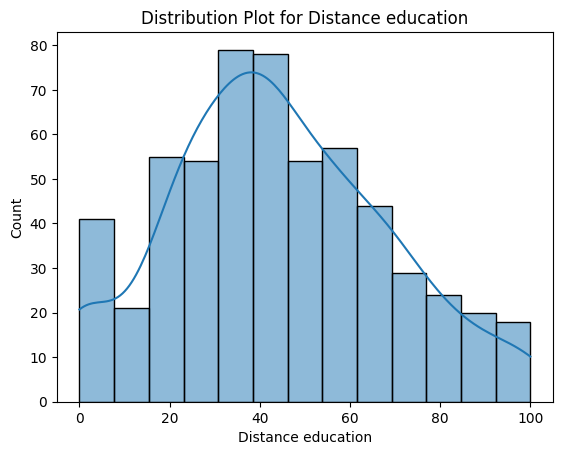

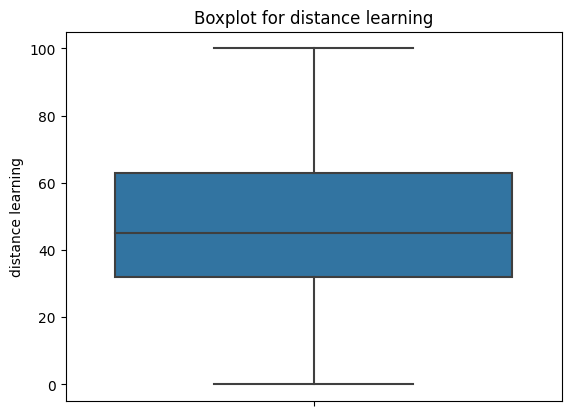

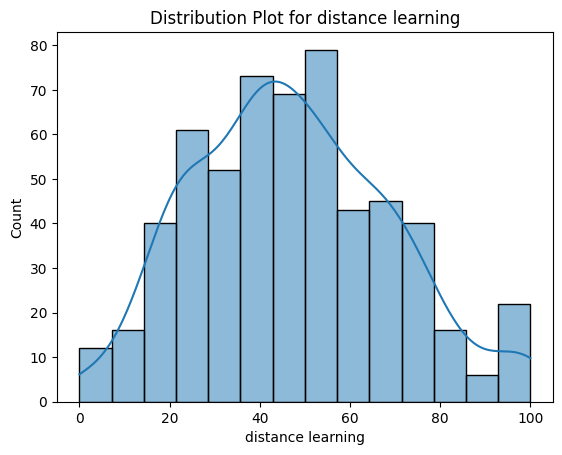

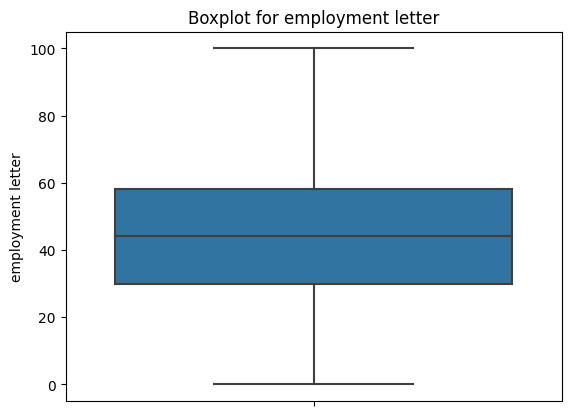

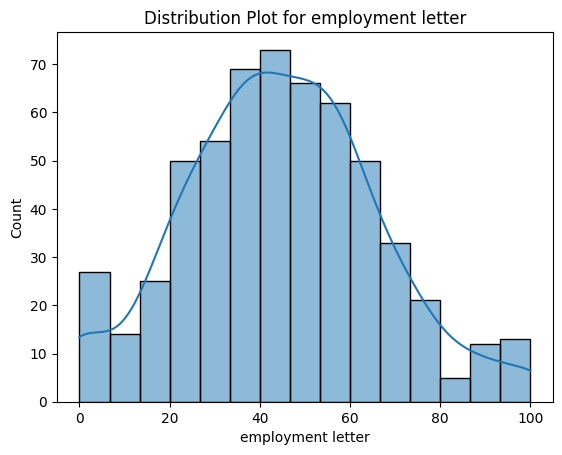

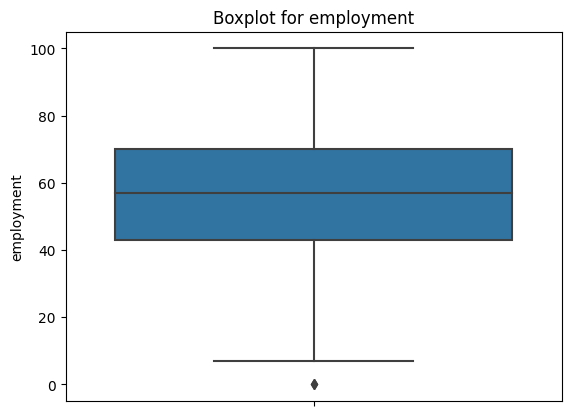

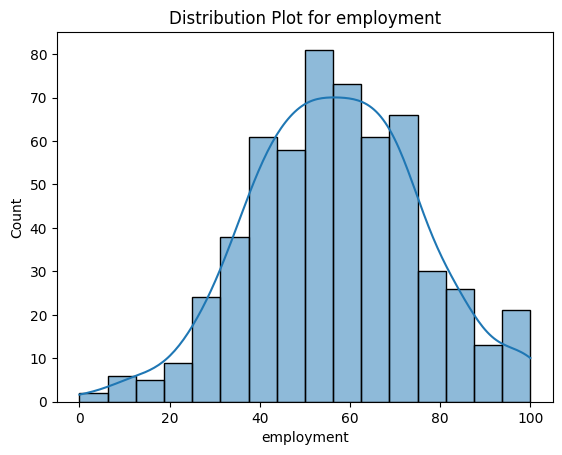

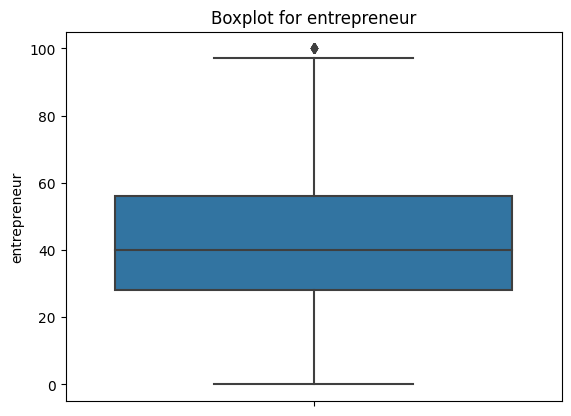

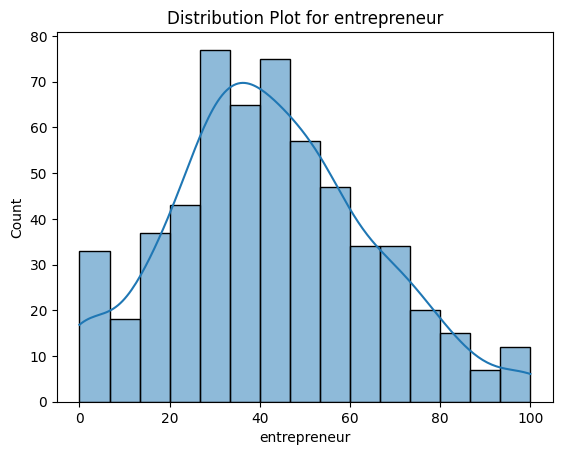

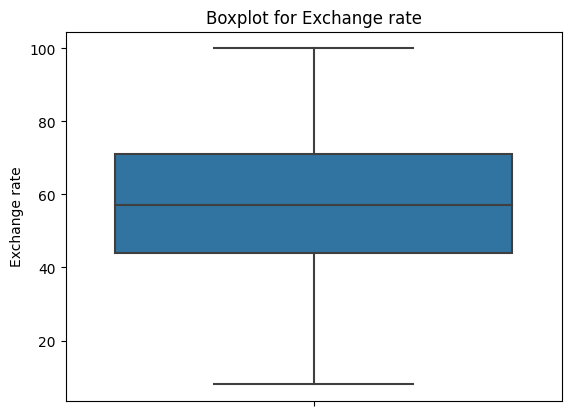

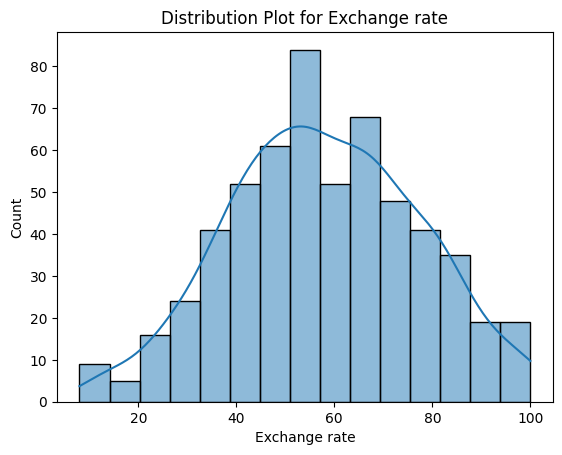

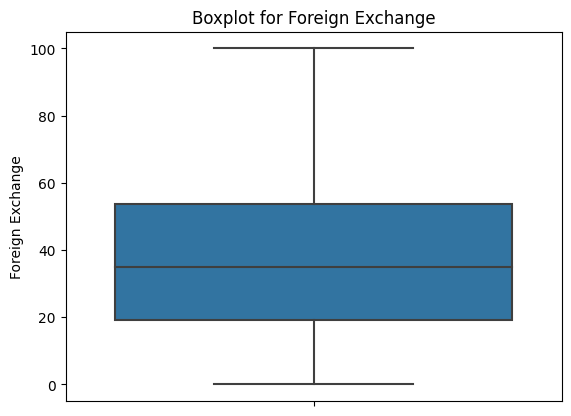

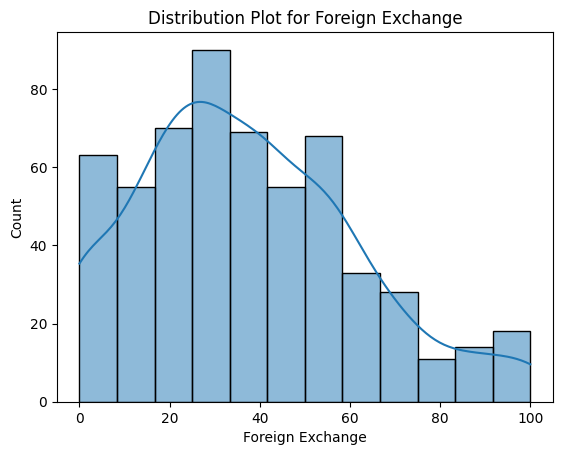

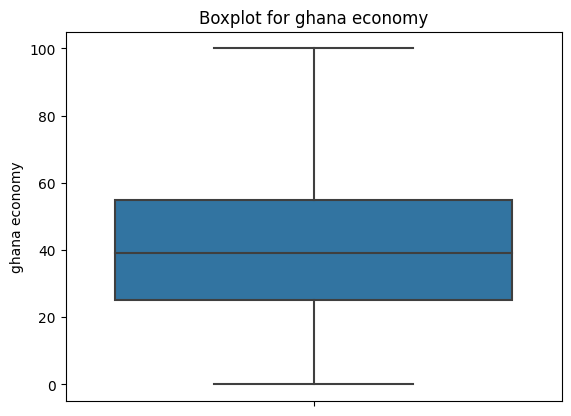

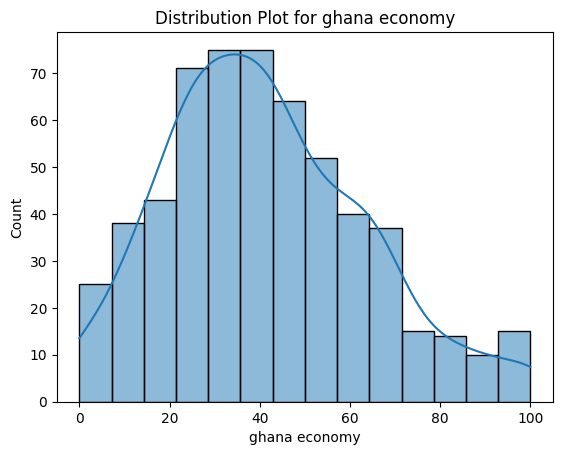

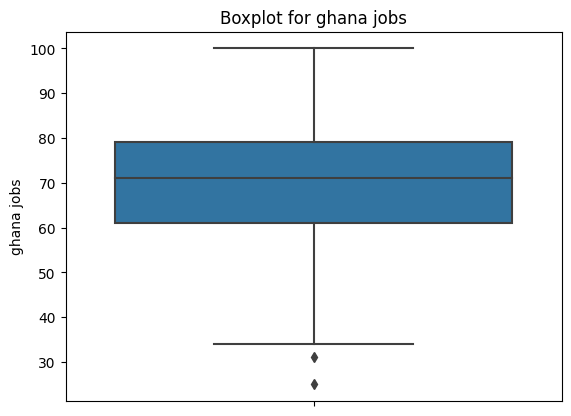

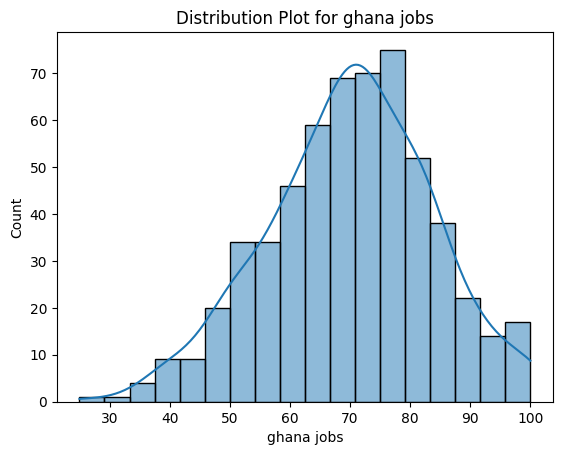

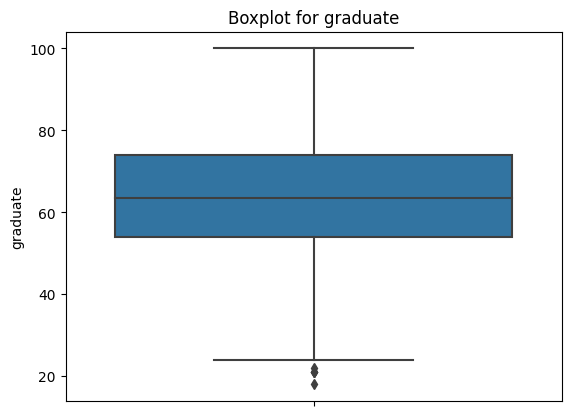

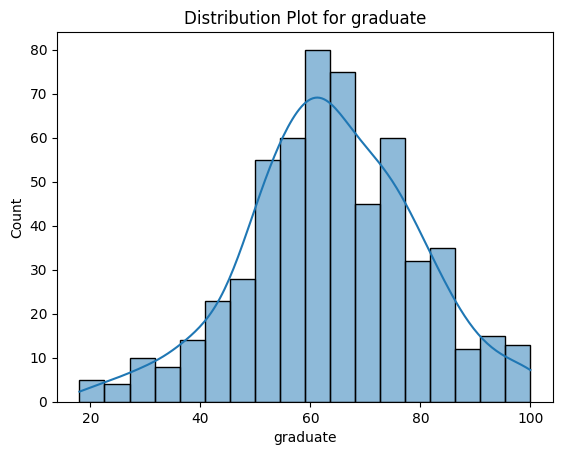

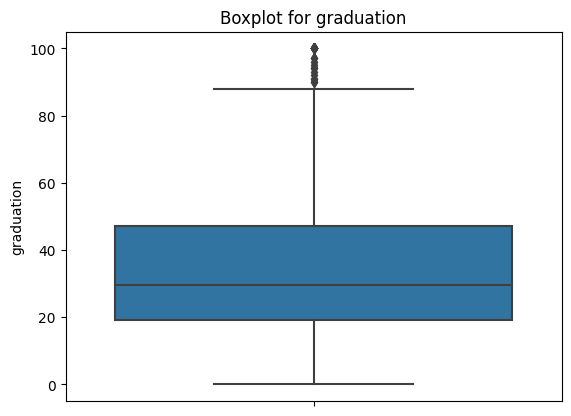

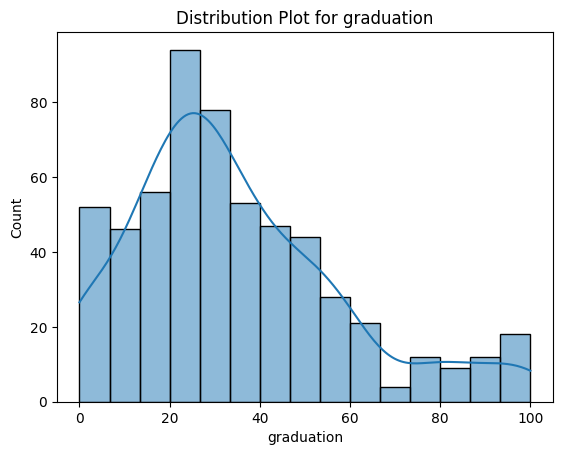

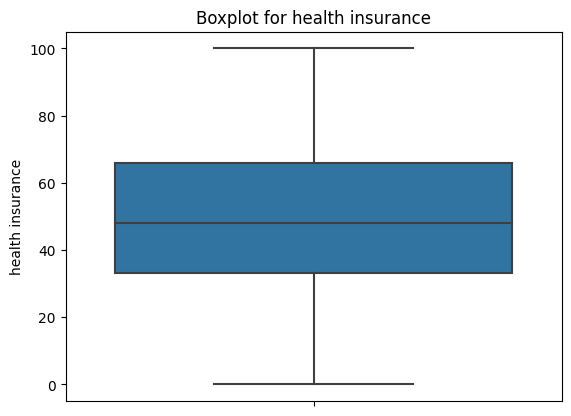

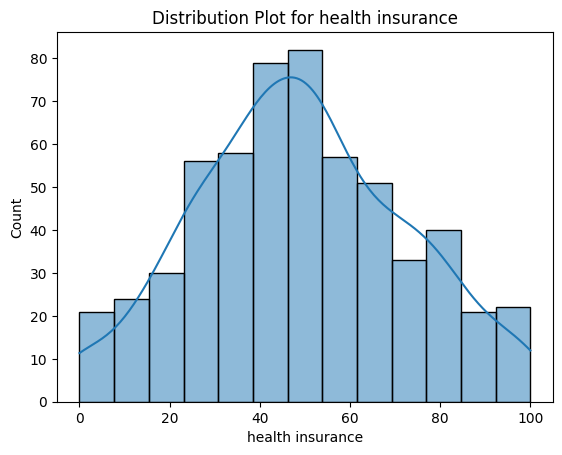

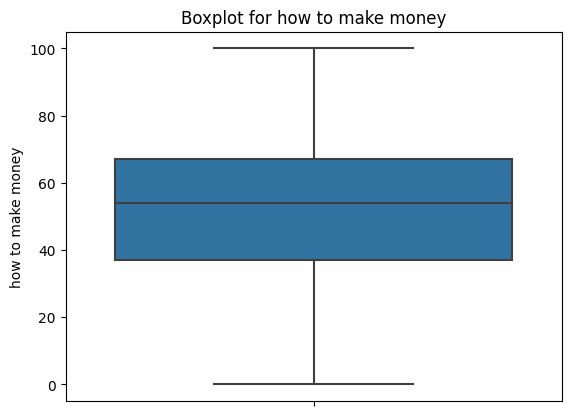

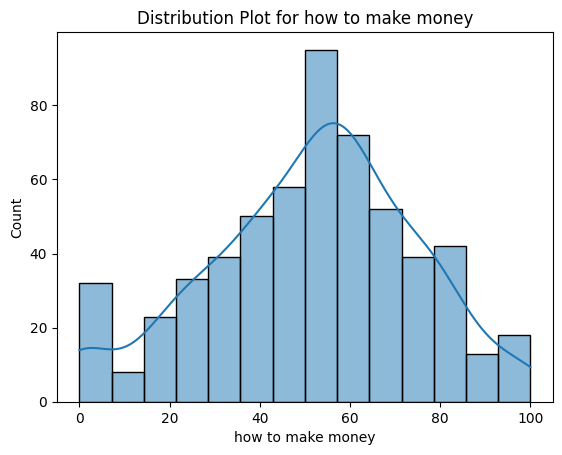

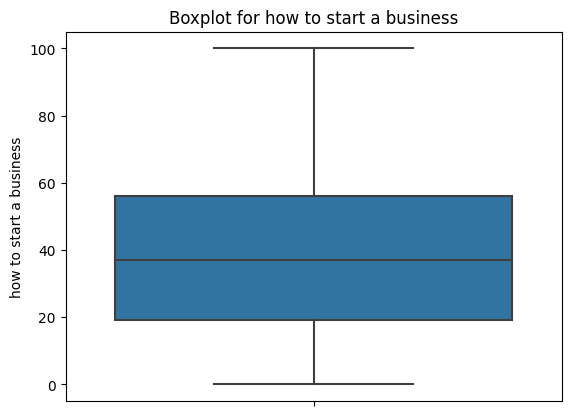

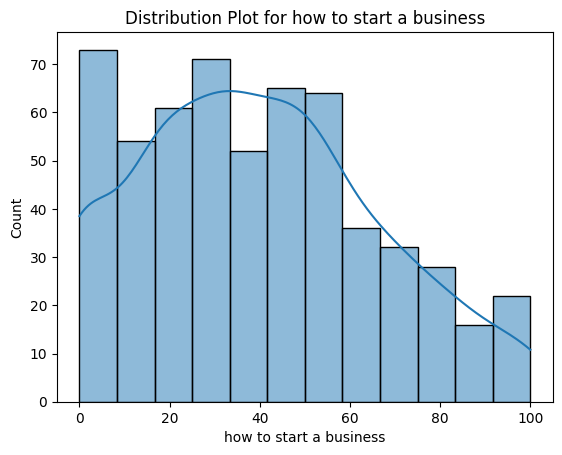

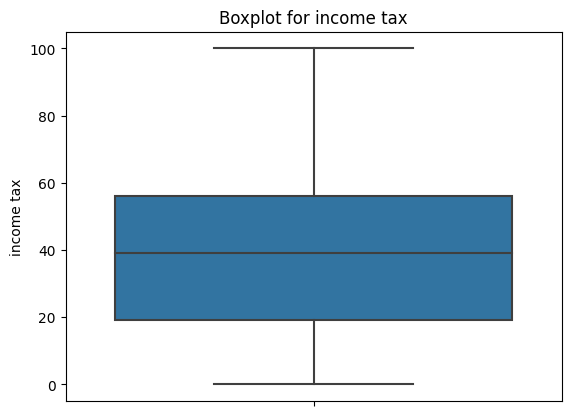

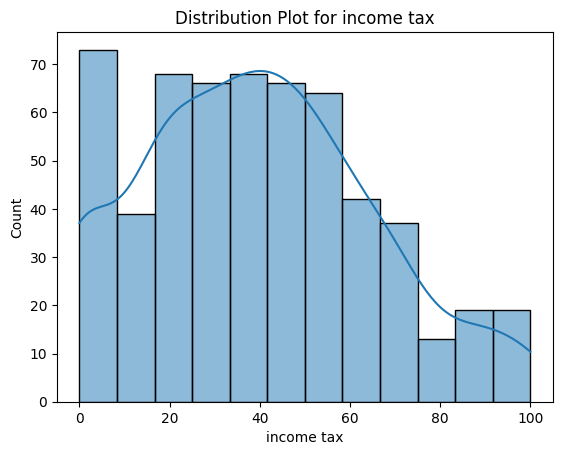

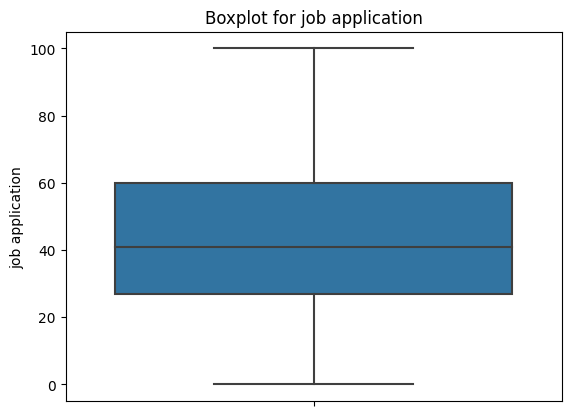

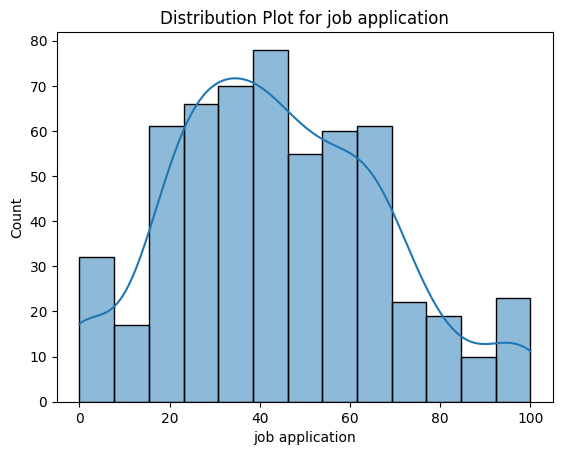

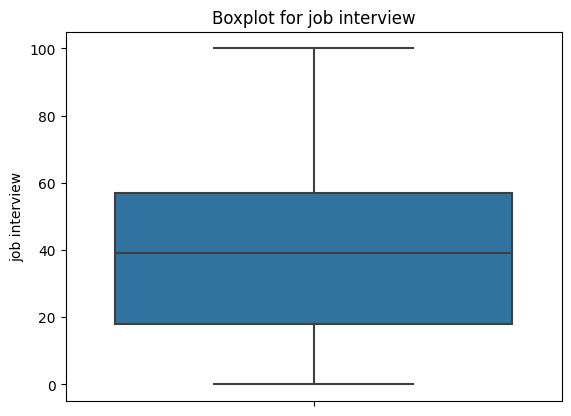

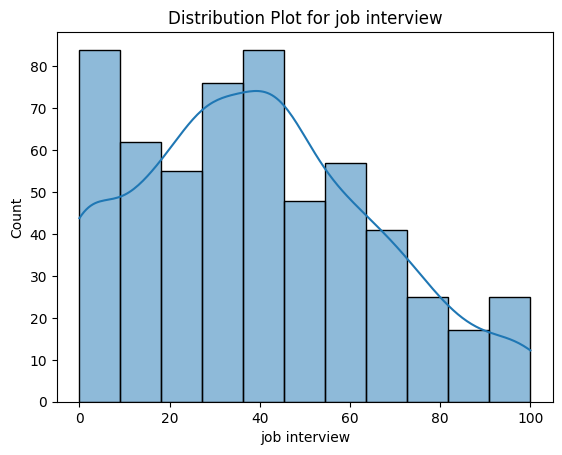

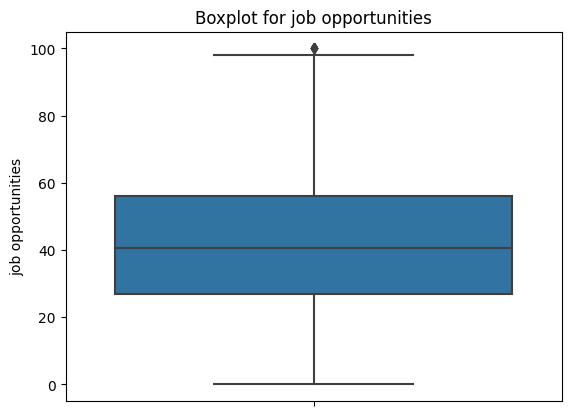

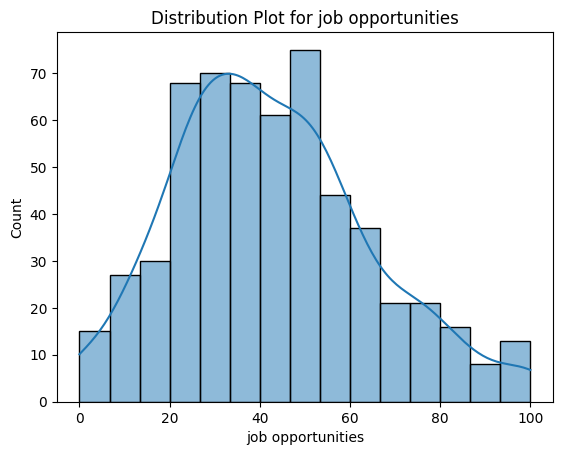

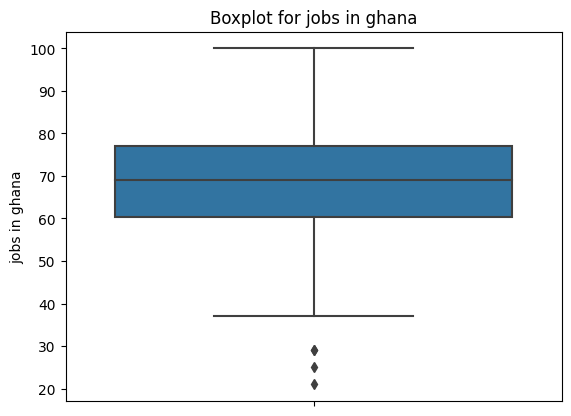

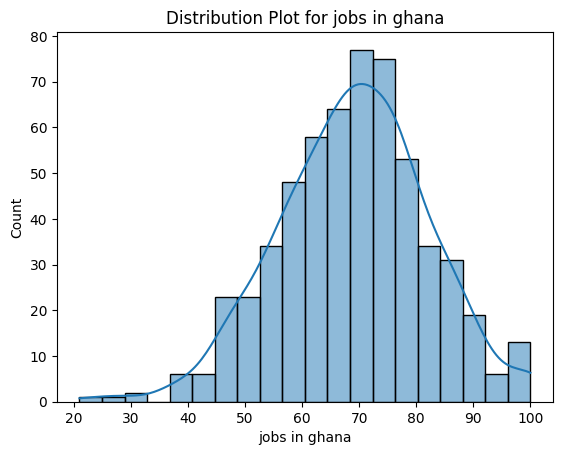

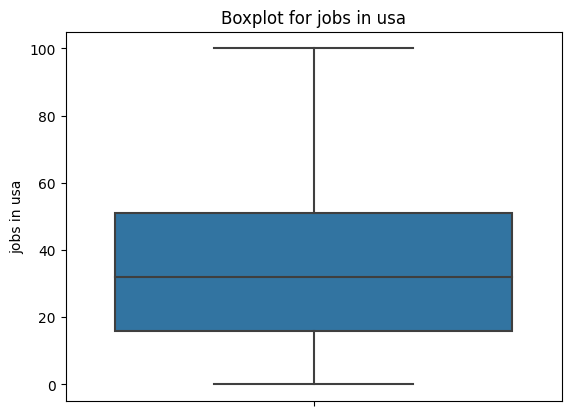

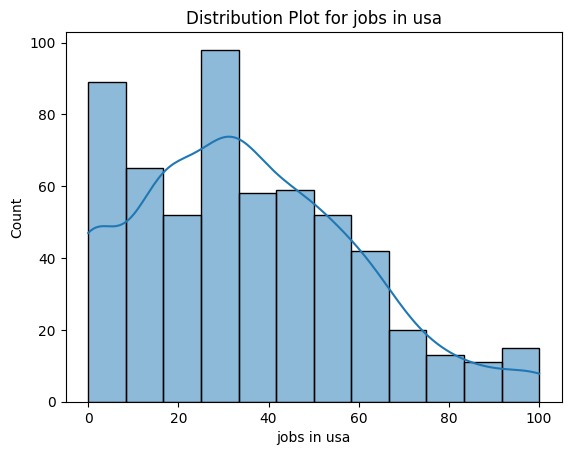

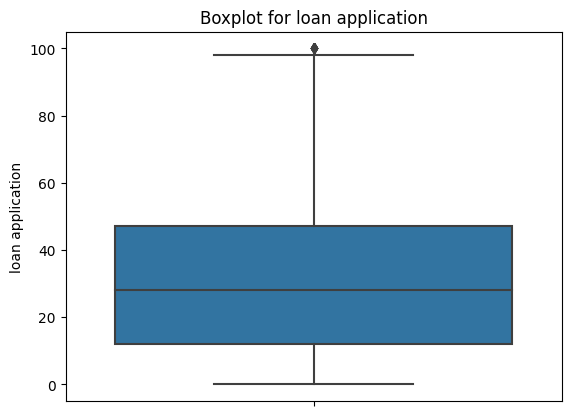

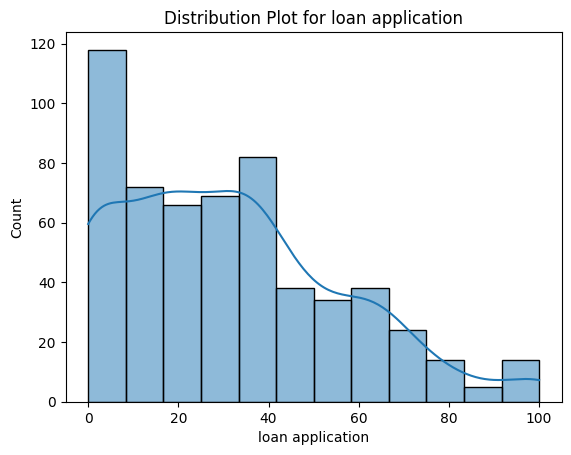

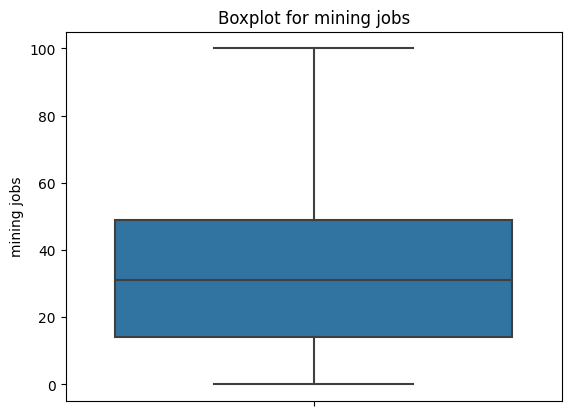

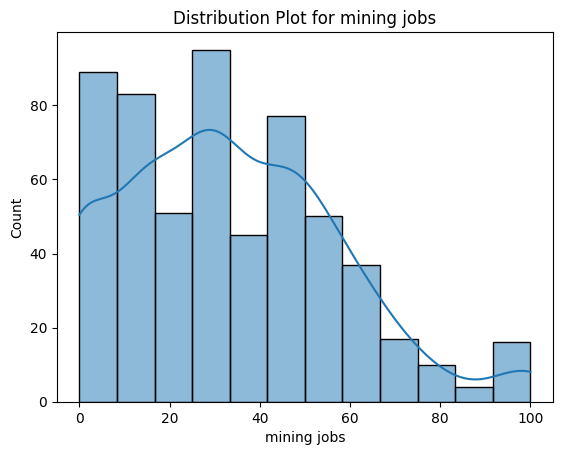

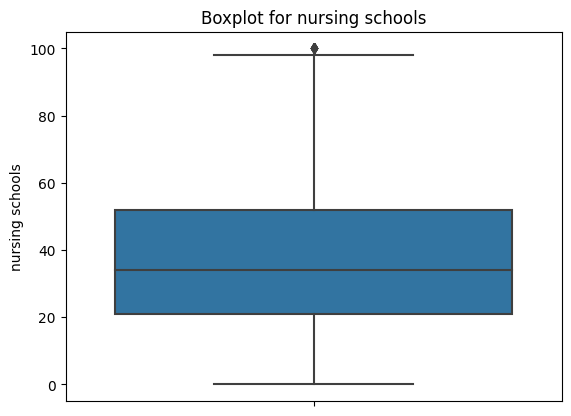

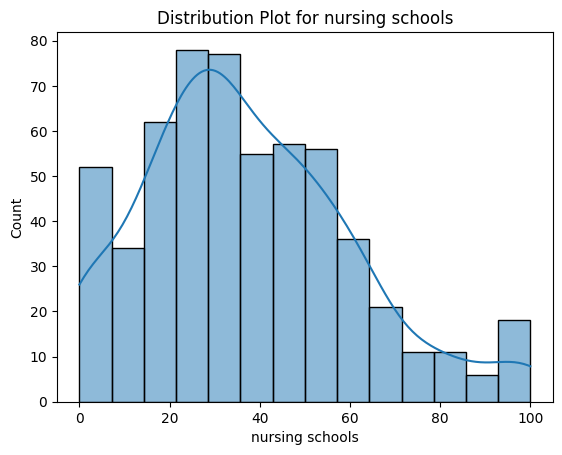

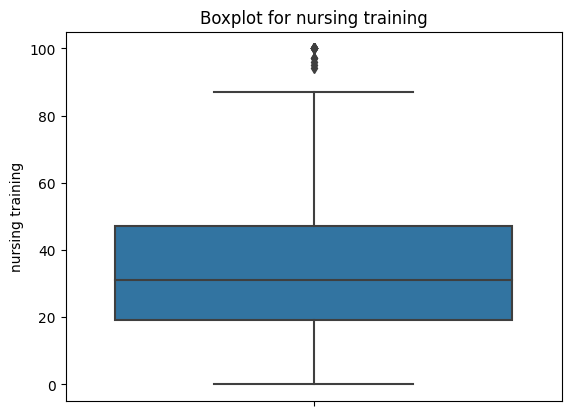

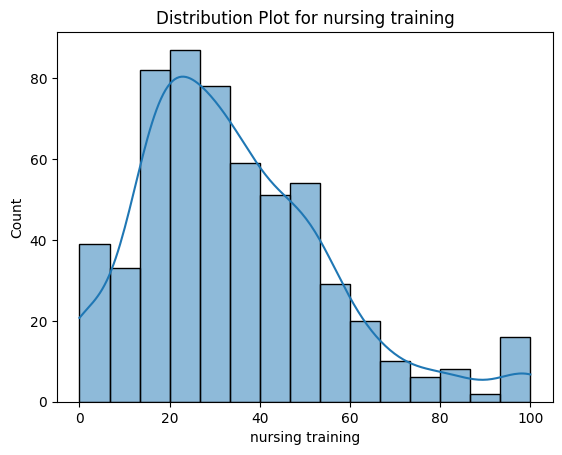

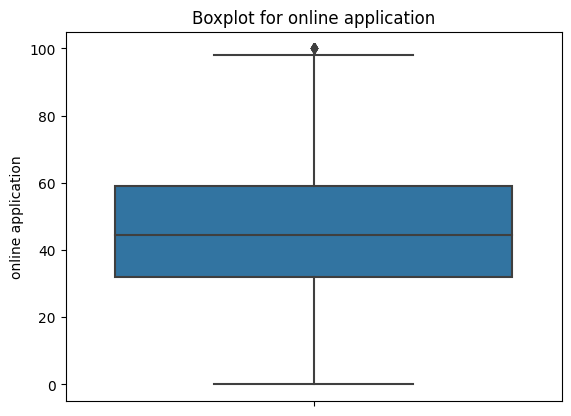

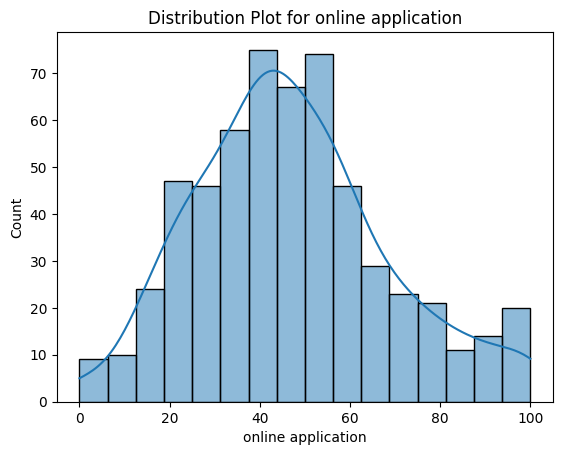

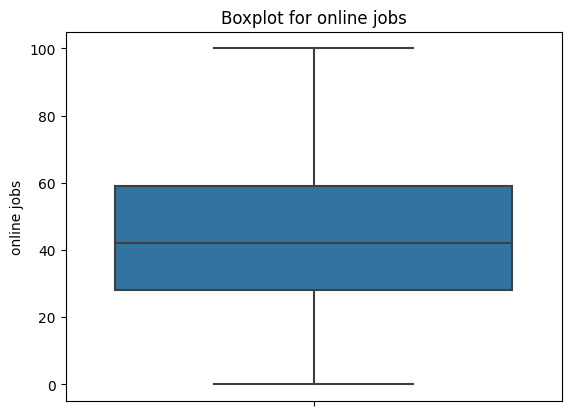

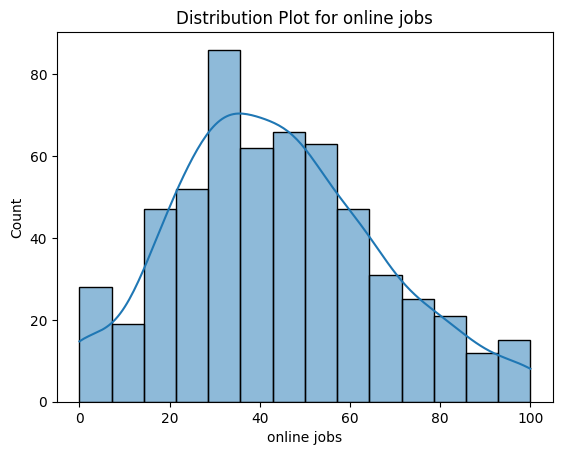

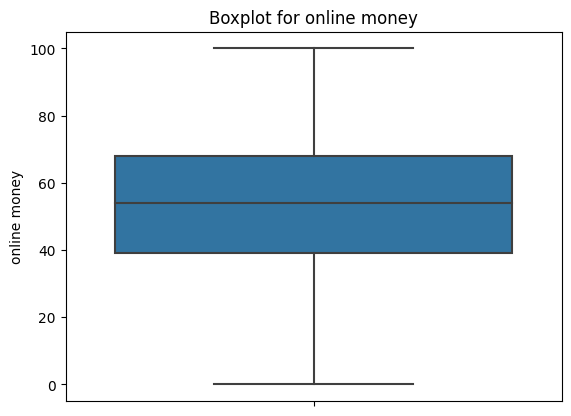

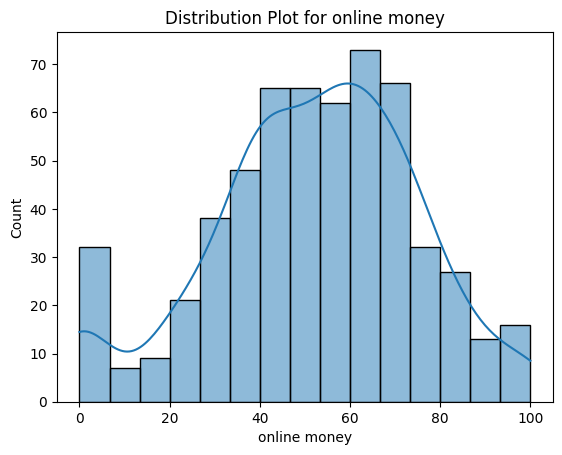

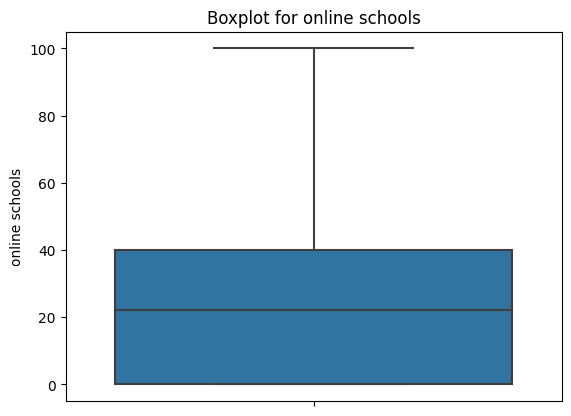

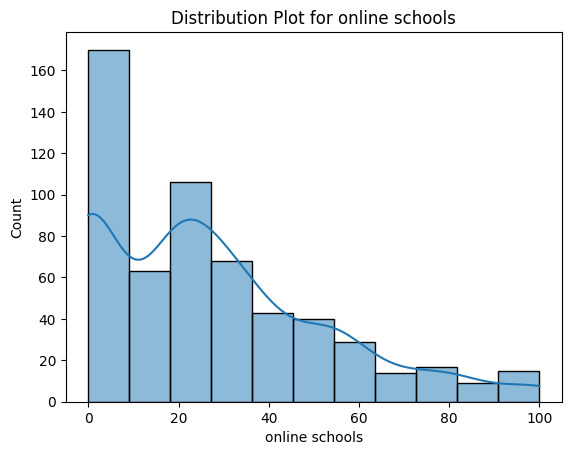

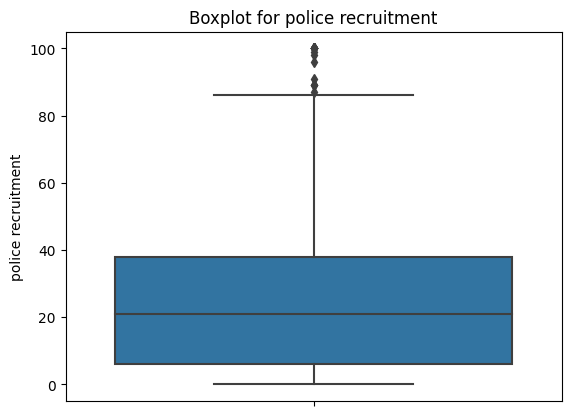

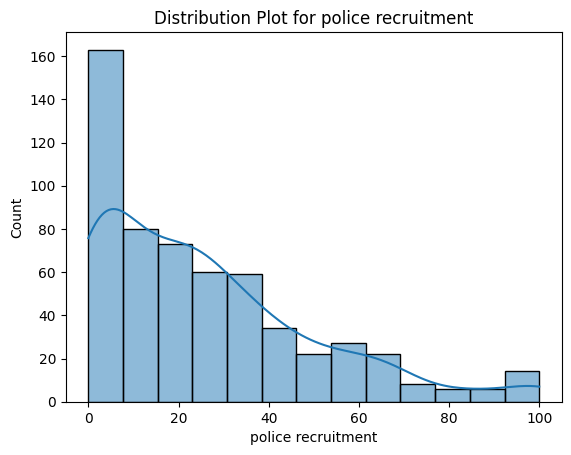

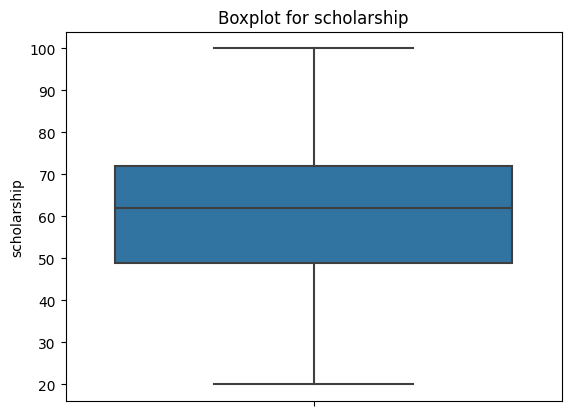

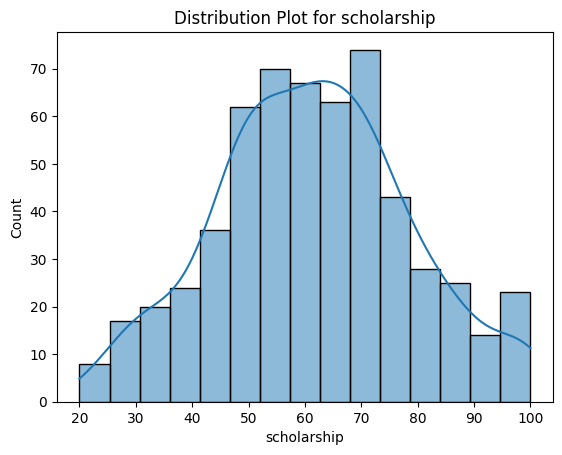

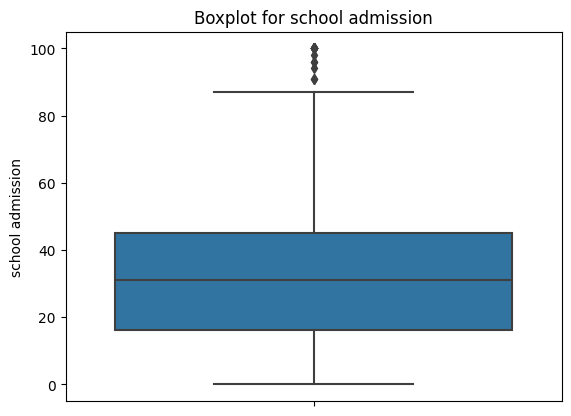

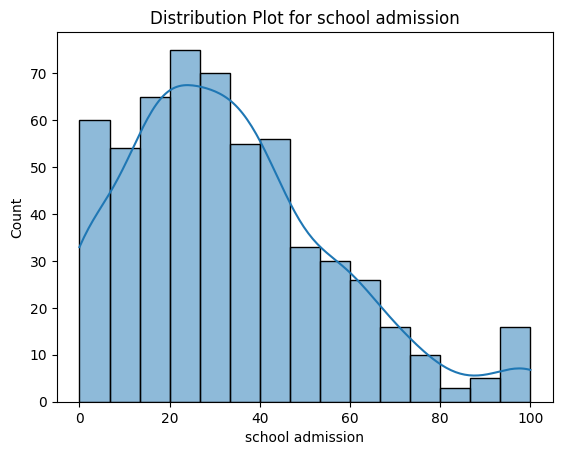

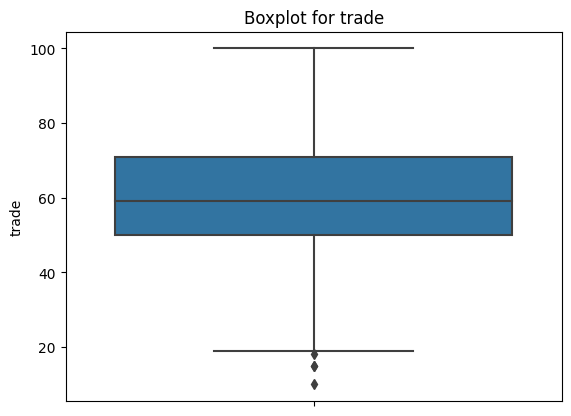

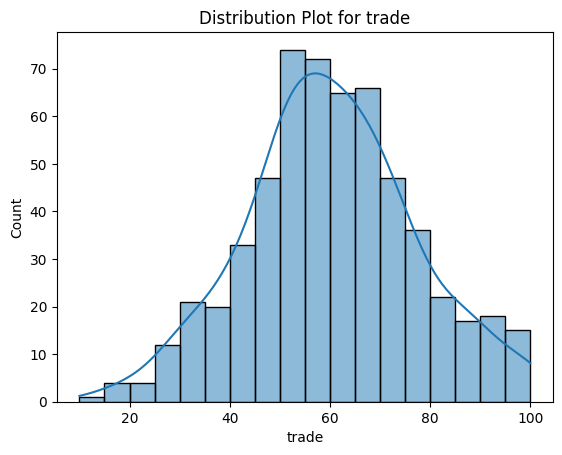

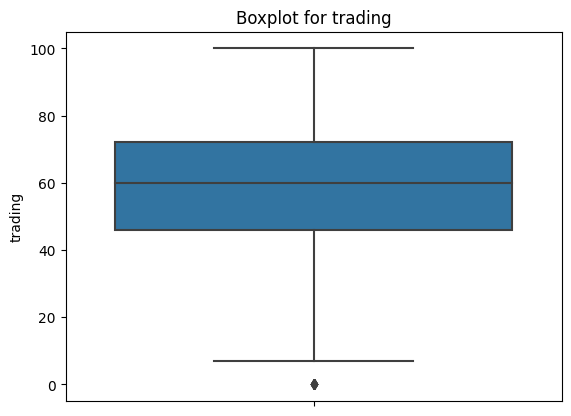

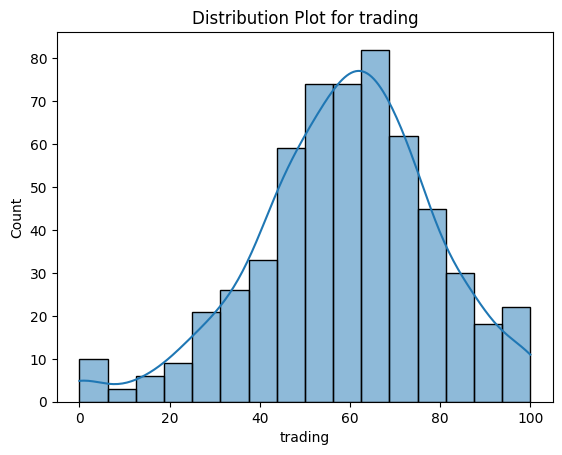

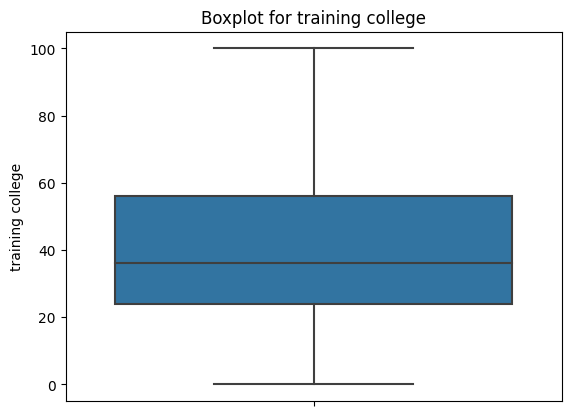

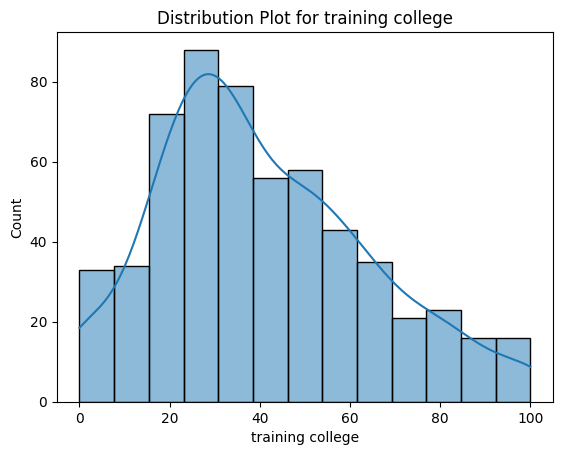

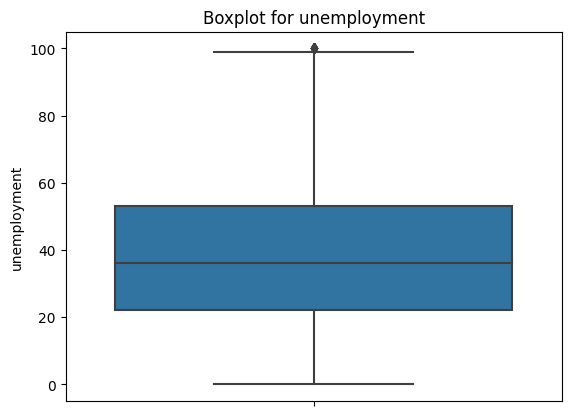

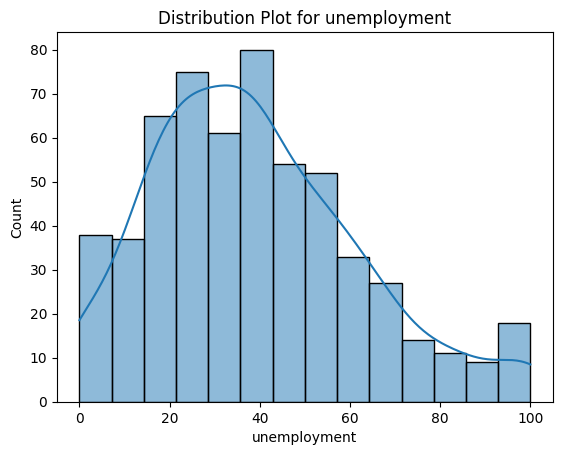

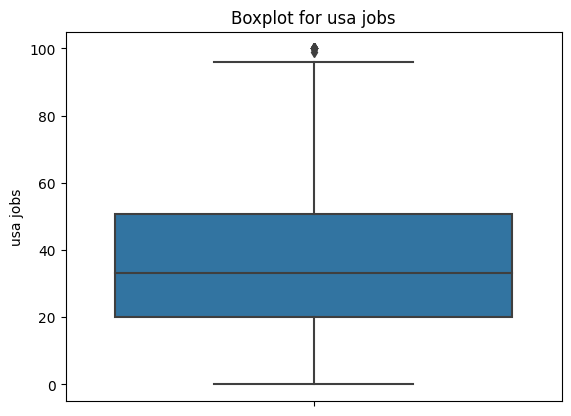

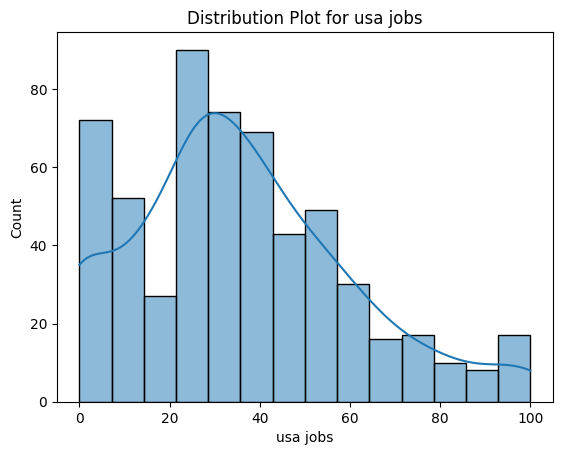

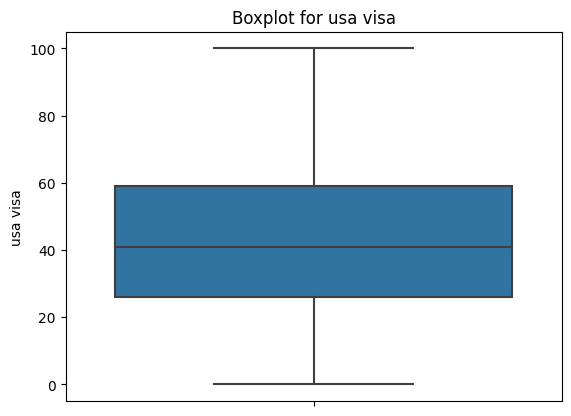

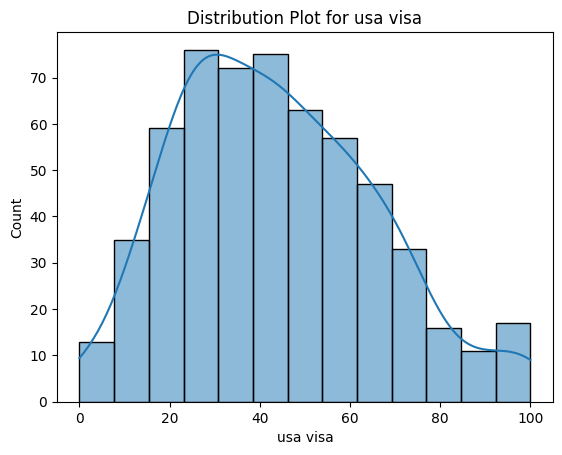

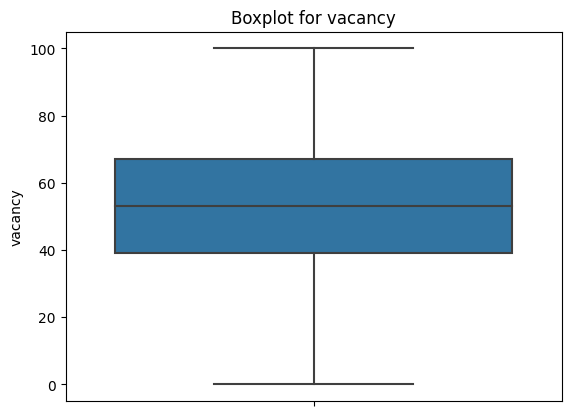

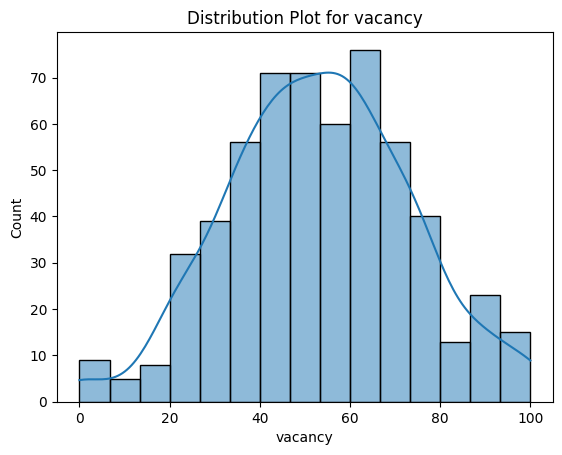

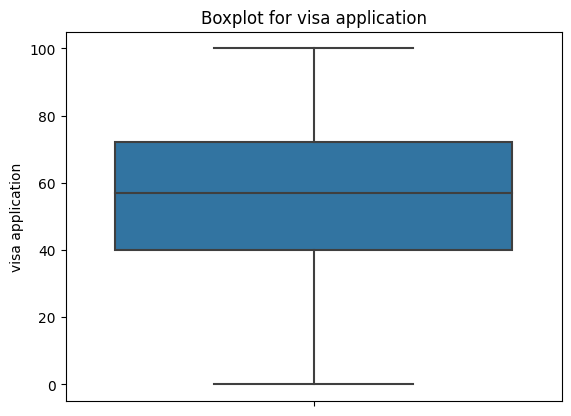

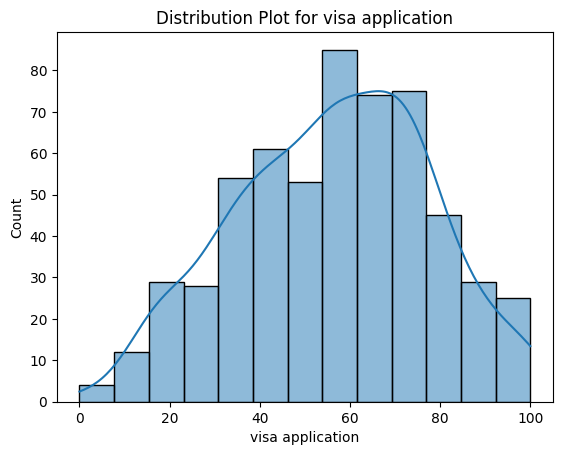

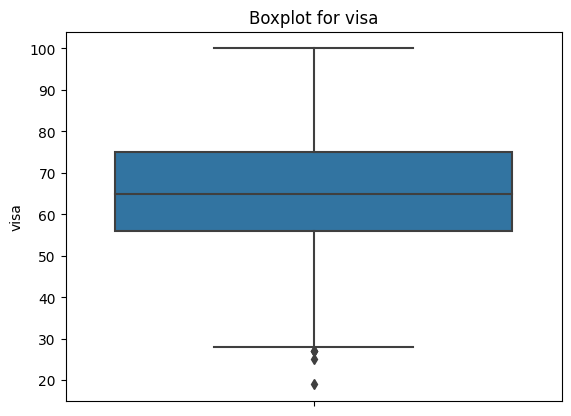

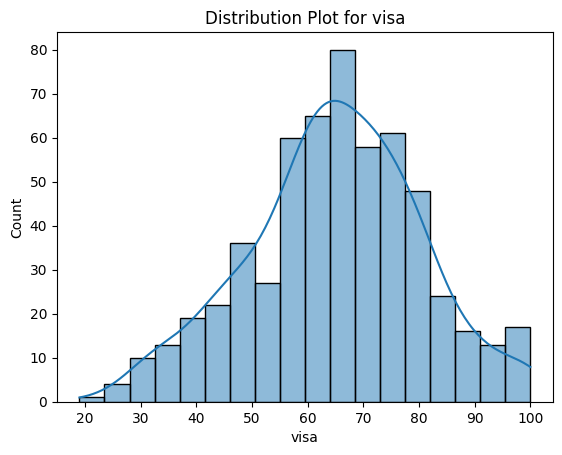

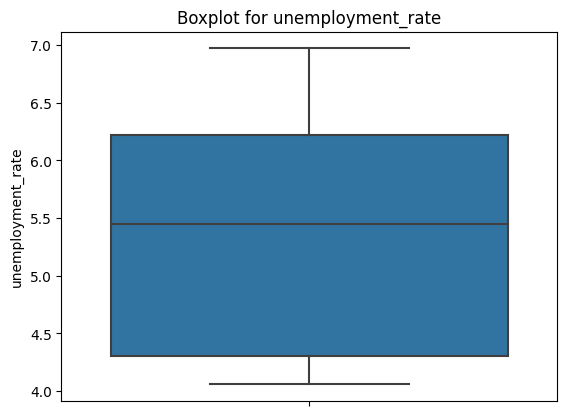

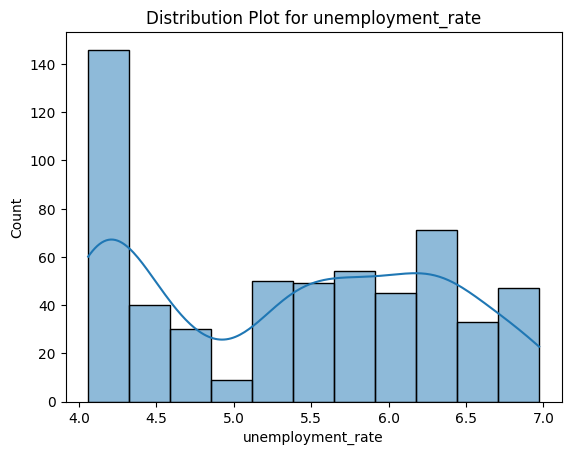

In [86]:
for column in data.columns[1:]:
    plot_boxplot(data, column)
    plot_distribution_plot(data, column)

In [87]:
def apply_thresholds(column):
    # Set the min and max thresholds for each column
    min_threshold, max_threshold = column.quantile([0.01, 0.95])

    # Clip values to be within the specified range
    clipped_values = column.clip(min_threshold, max_threshold)

    return clipped_values

def apply_thresholds_to_all_columns(dataframe):
    # Exclude the 'week' column from processing
    columns_to_process = dataframe.columns.difference(['week'])

    # Apply the apply_thresholds function to selected columns
    processed_dataframe = dataframe[columns_to_process].apply(apply_thresholds)

    # Concatenate the processed columns with the 'week' column
    processed_dataframe = pd.concat([dataframe['week'], processed_dataframe], axis=1)

    return processed_dataframe

In [88]:
# Apply the function to all columns in the dataset
processed_df = apply_thresholds_to_all_columns(data)

# Display the processed dataset
print(processed_df.head())

        week  Business opportunities  Curriculum vitae  Distance education  \
0   1/3/2010                    38.0                 0                 0.0   
1  1/10/2010                     0.0                34                38.0   
2  1/17/2010                     0.0                35                38.0   
3  1/24/2010                     0.0                64                70.0   
4  1/31/2010                    32.0                 0                 0.0   

   Exchange rate  Foreign Exchange  acceptance letter  american lottery  \
0           14.0                 0                0.0                17   
1           28.0                 0                0.0                 0   
2           71.0                39                0.0                34   
3           52.0                 0               45.0                 0   
4           25.0                34                0.0                 0   

   application for employment  application letter  ...  trade  trading  \
0     

In [93]:
def remove_outliers(dataframe):
    # Select only numeric columns
    numeric_columns = dataframe.select_dtypes(include=['number'])

    # Set the min and max thresholds for each numeric column
    min_thresholds, max_thresholds = numeric_columns.quantile([0.00, 0.95]).iloc[0], numeric_columns.quantile([0.001, 0.999]).iloc[1]

    # Create a boolean mask to identify rows outside the threshold range
    mask = ((numeric_columns >= min_thresholds) & (numeric_columns <= max_thresholds)).all(axis=1)

    # Apply the mask to the dataframe to keep only rows within the range
    cleaned_dataframe = dataframe[mask]

    return cleaned_dataframe

In [94]:
# Remove outliers from the processed dataframe
cleaned_df = remove_outliers(processed_df)

# Display the cleaned dataset
print(cleaned_df.head())

        week  Business opportunities  Curriculum vitae  Distance education  \
0   1/3/2010                    38.0                 0                 0.0   
1  1/10/2010                     0.0                34                38.0   
2  1/17/2010                     0.0                35                38.0   
3  1/24/2010                     0.0                64                70.0   
4  1/31/2010                    32.0                 0                 0.0   

   Exchange rate  Foreign Exchange  acceptance letter  american lottery  \
0           14.0                 0                0.0                17   
1           28.0                 0                0.0                 0   
2           71.0                39                0.0                34   
3           52.0                 0               45.0                 0   
4           25.0                34                0.0                 0   

   application for employment  application letter  ...  trade  trading  \
0     

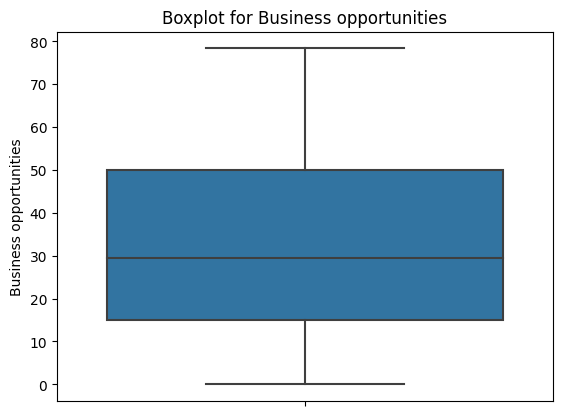

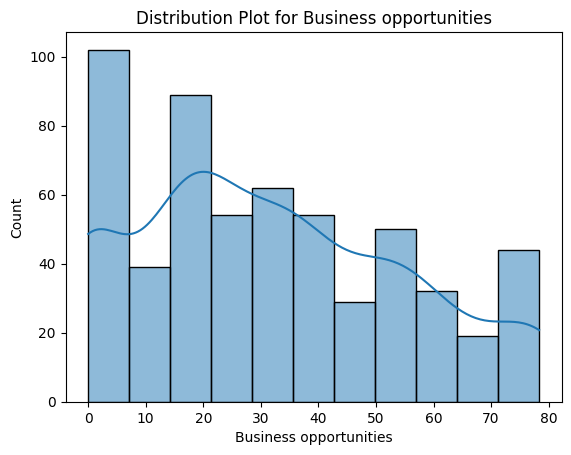

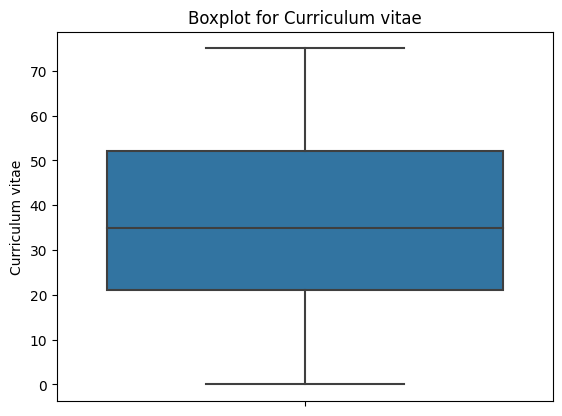

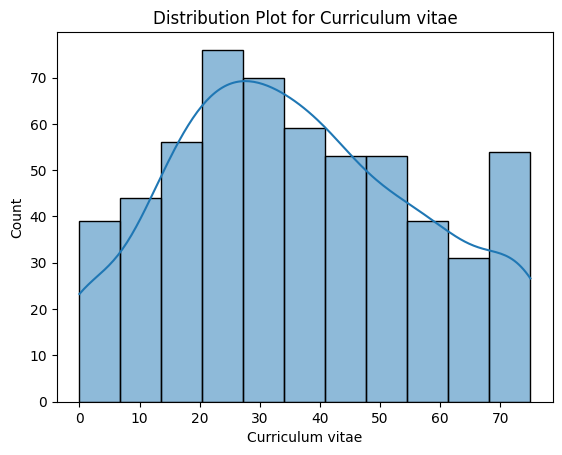

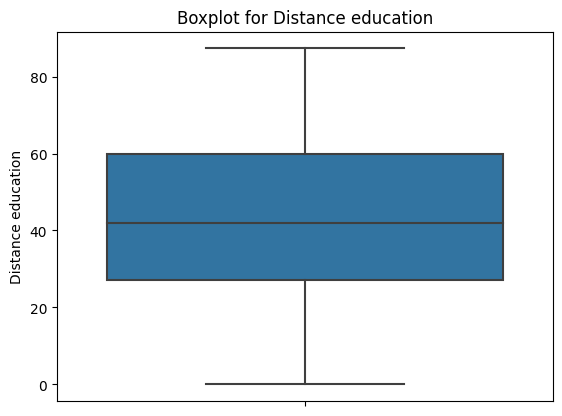

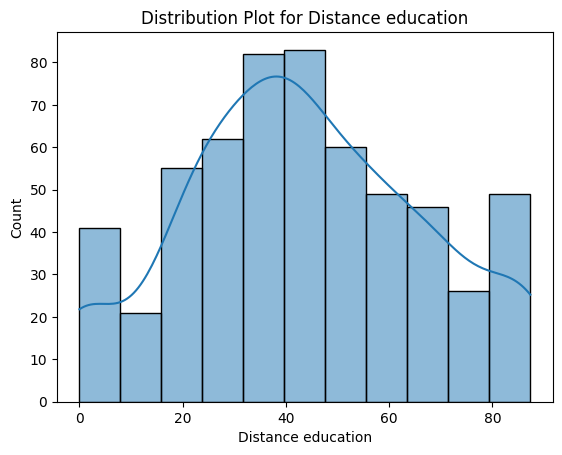

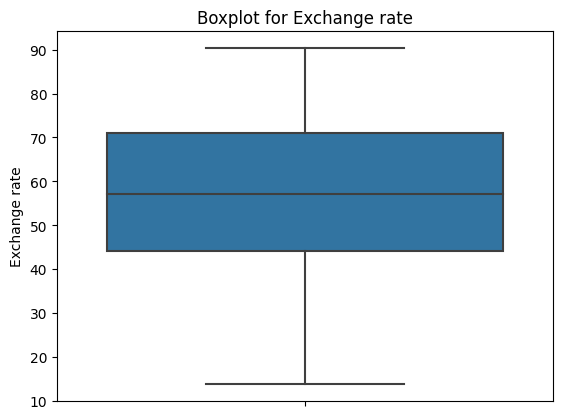

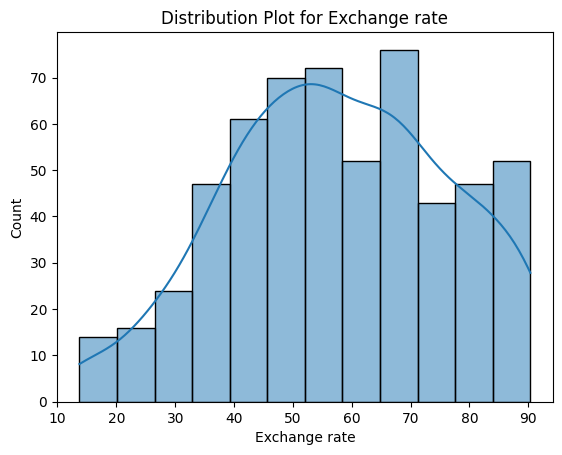

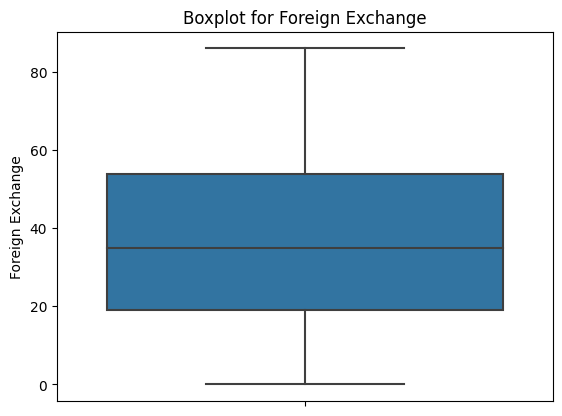

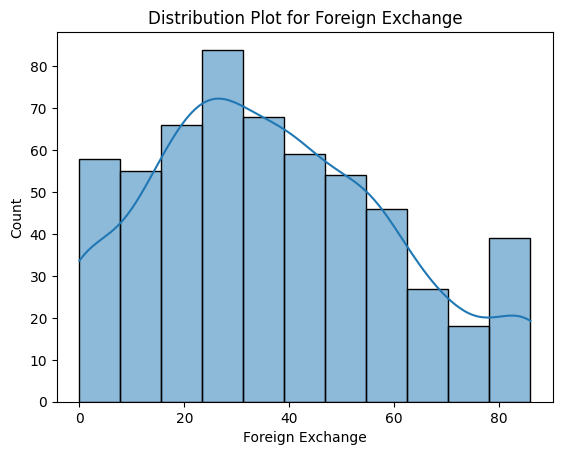

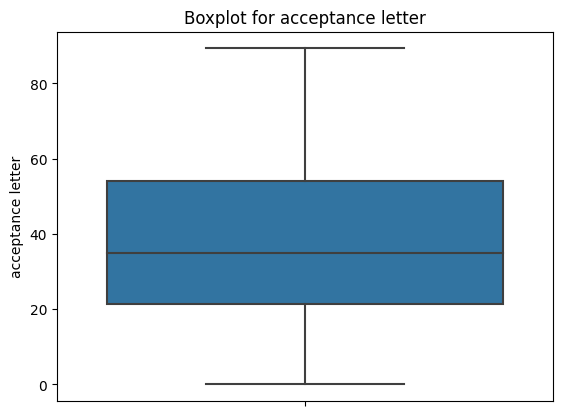

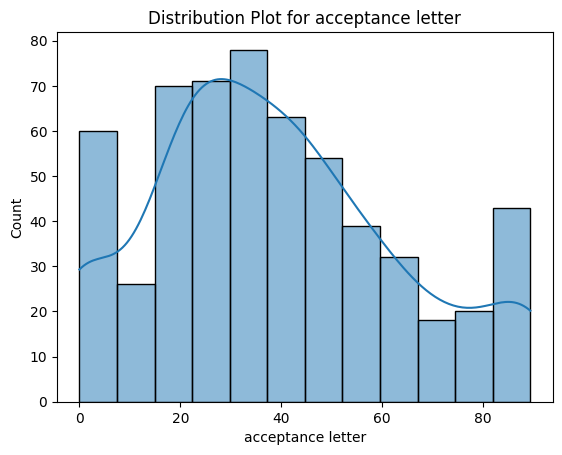

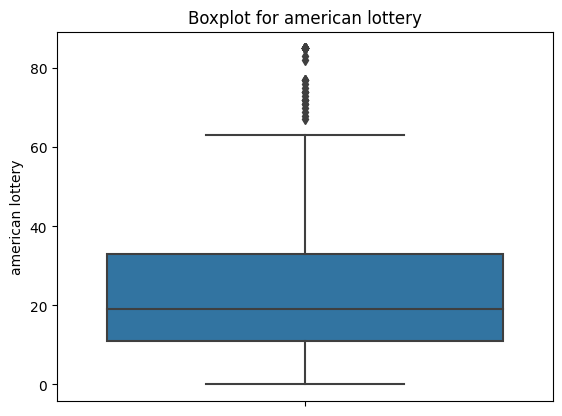

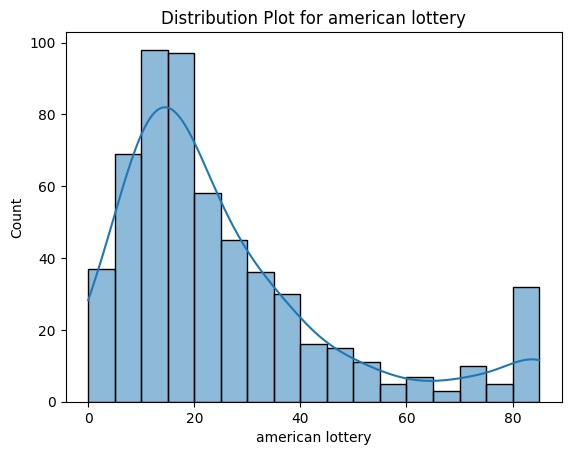

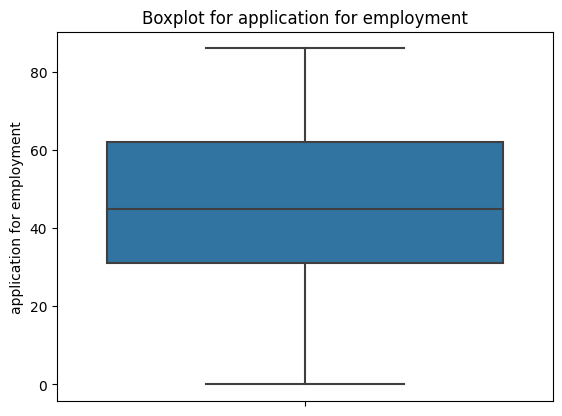

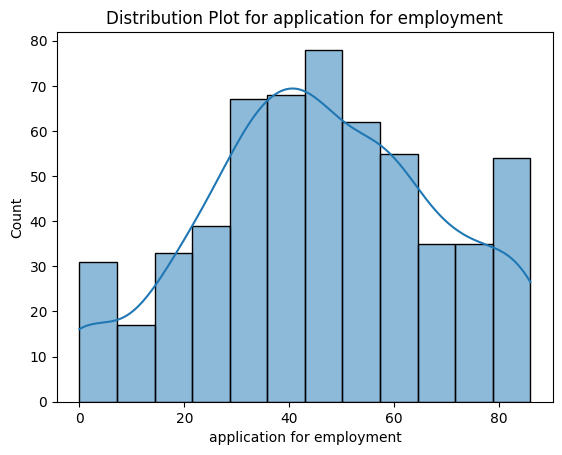

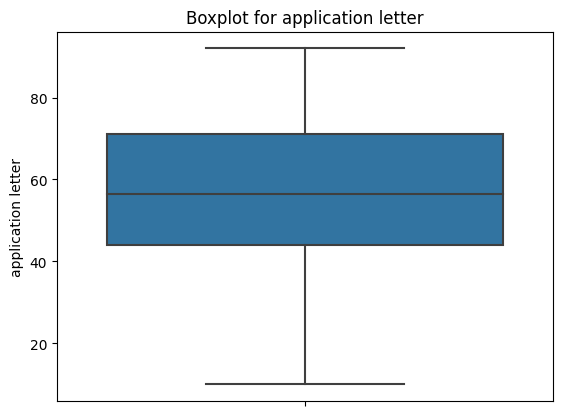

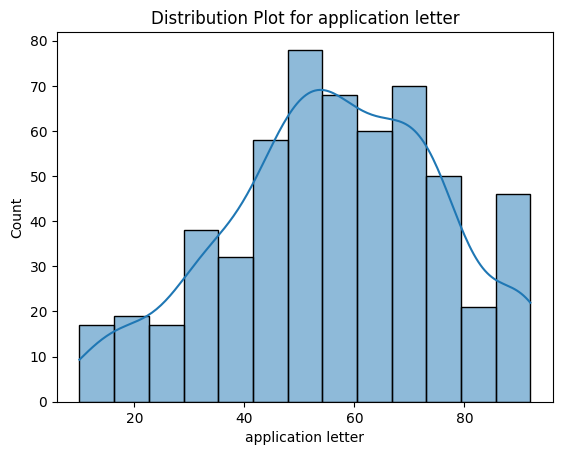

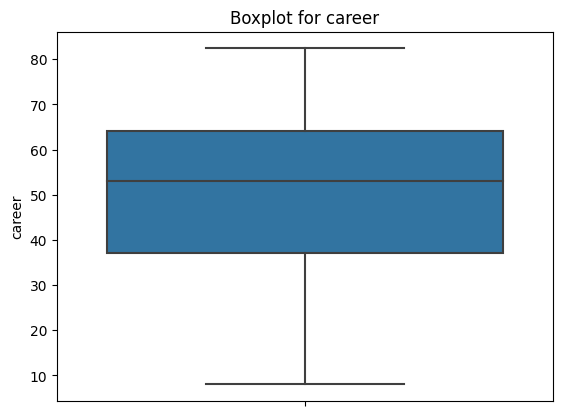

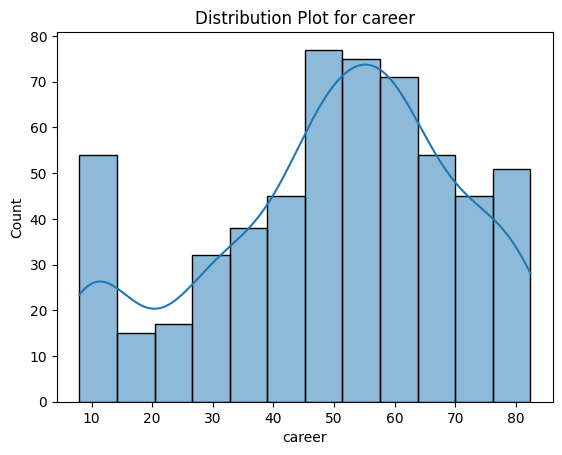

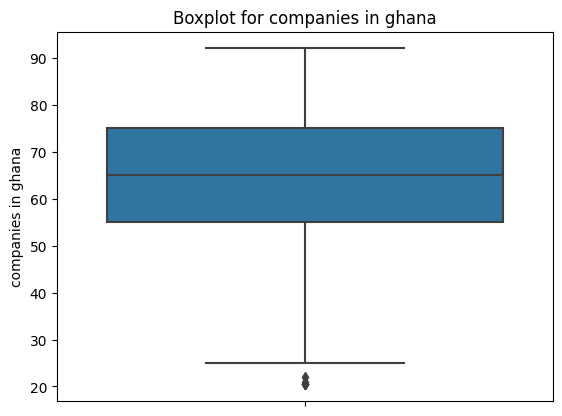

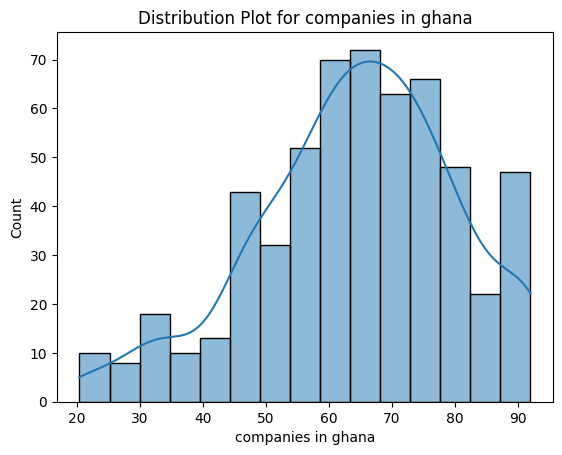

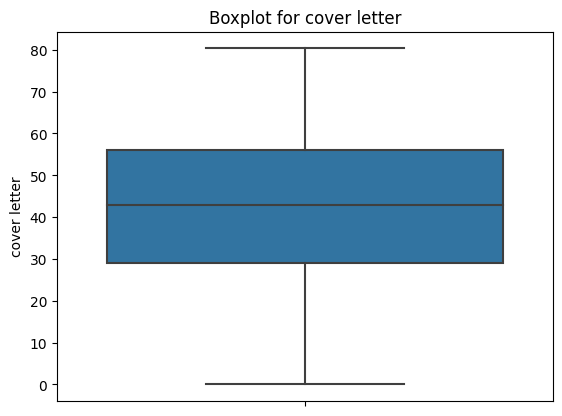

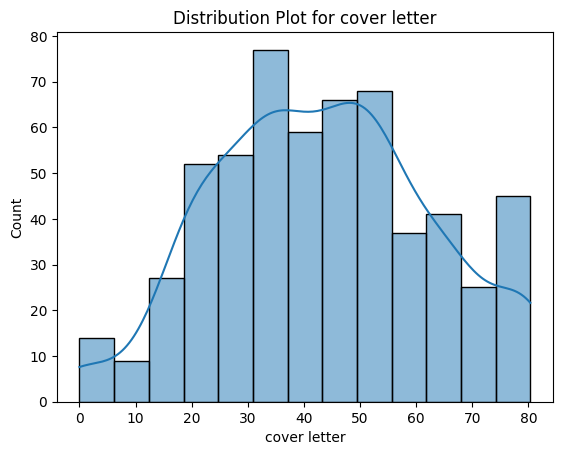

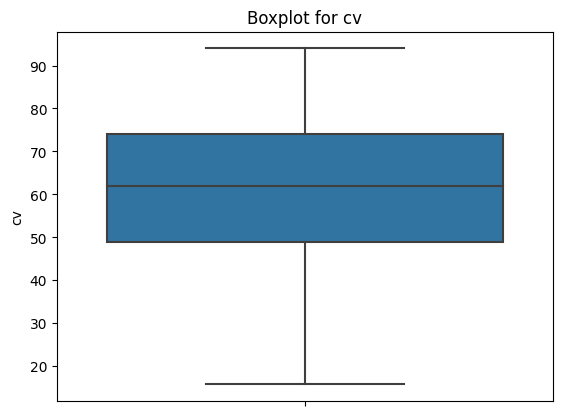

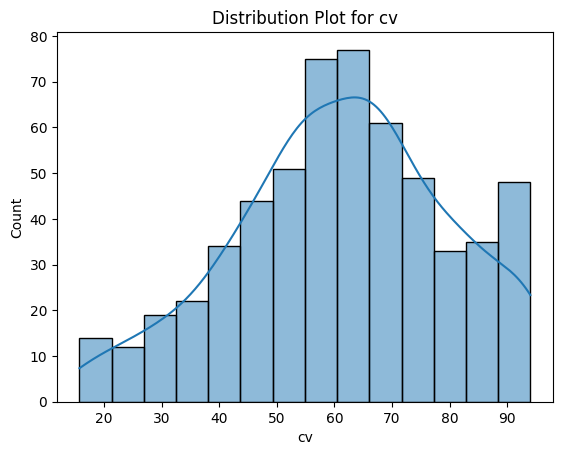

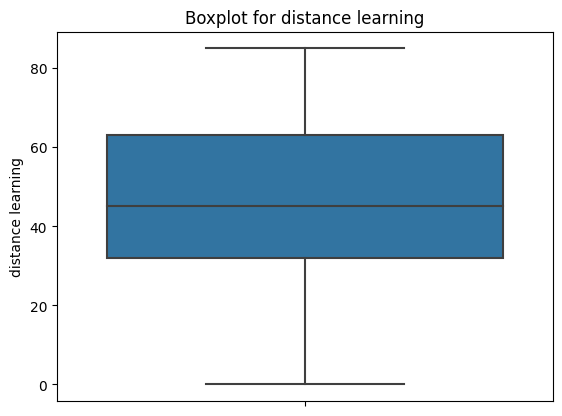

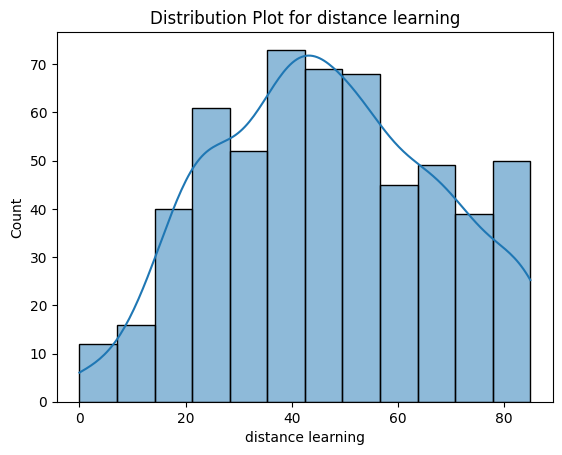

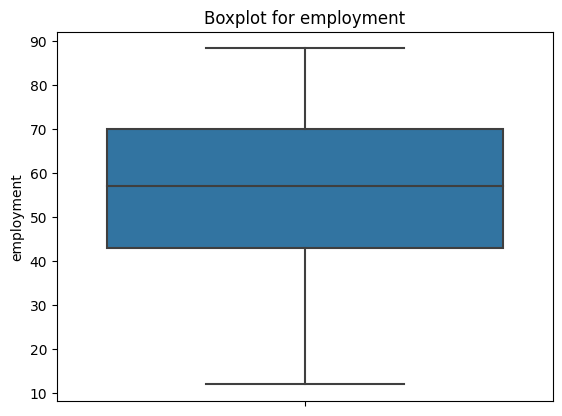

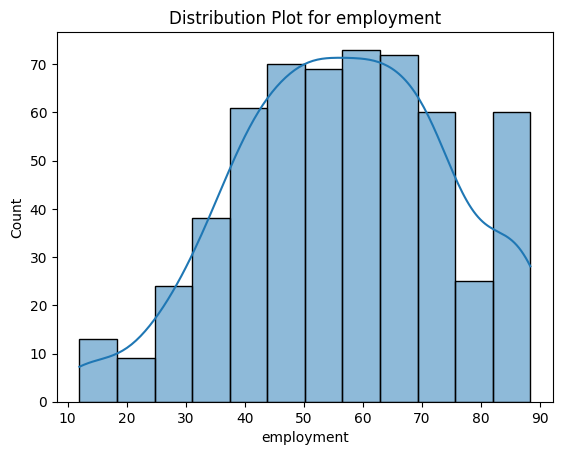

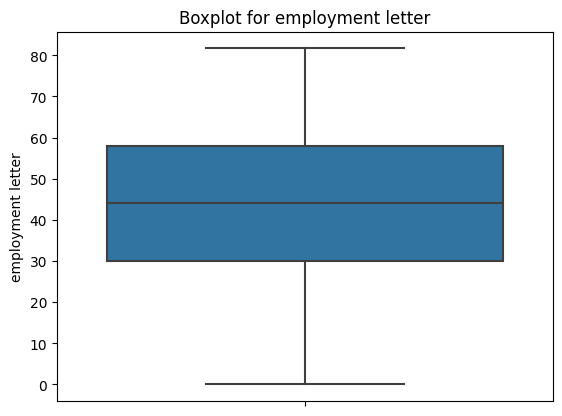

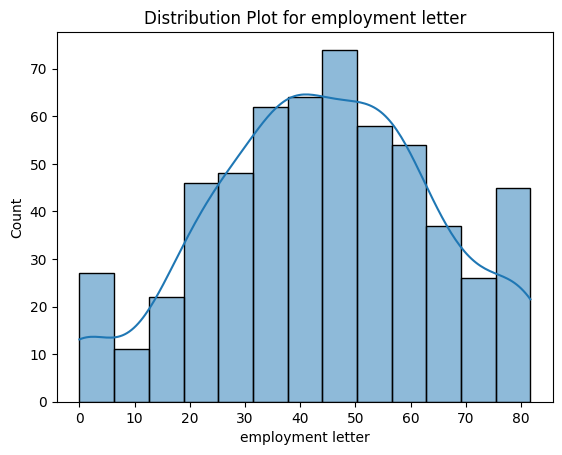

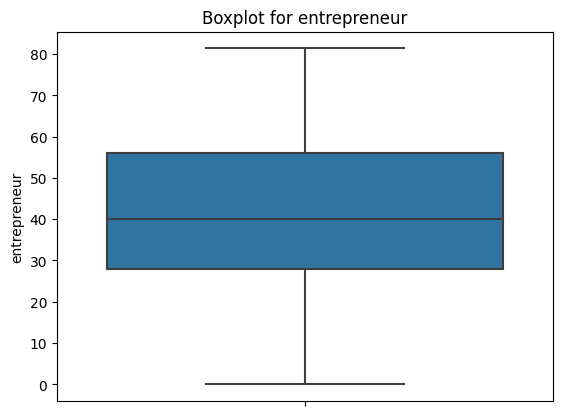

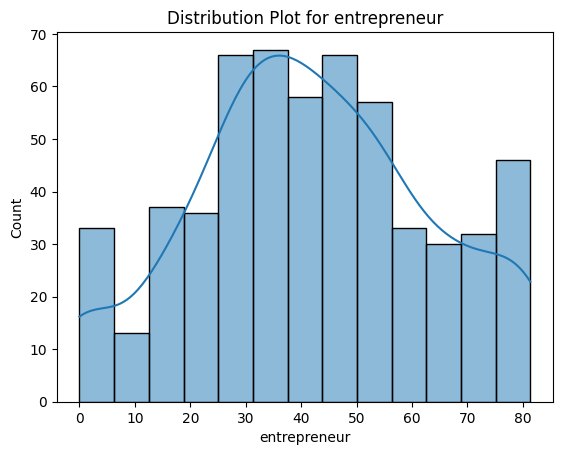

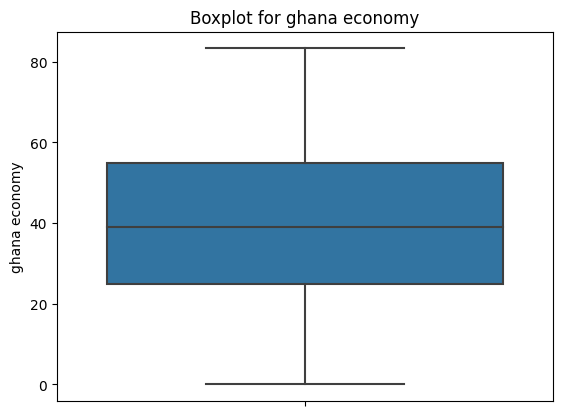

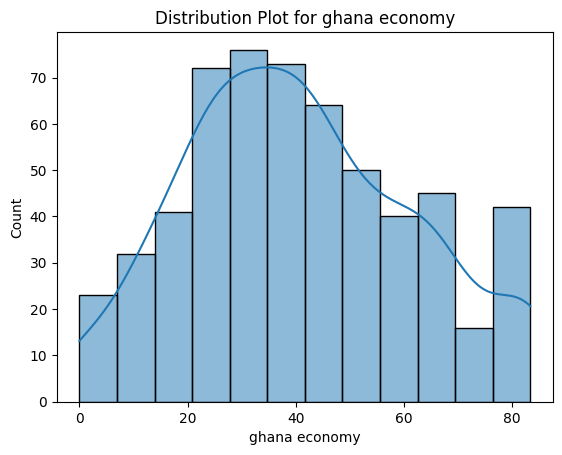

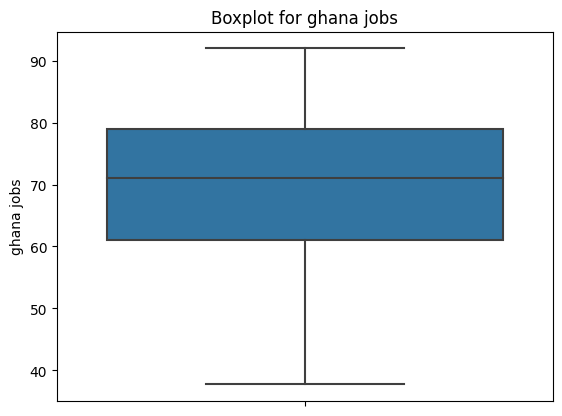

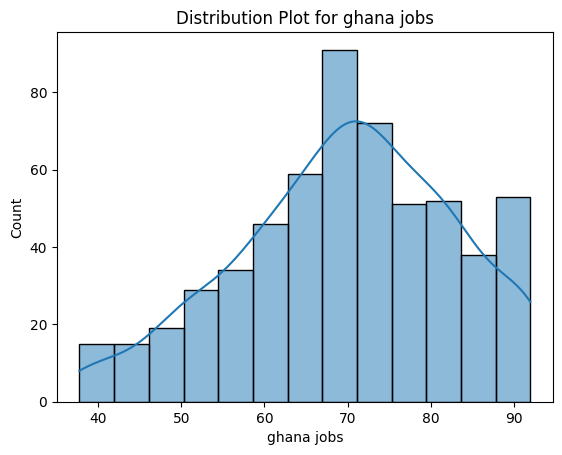

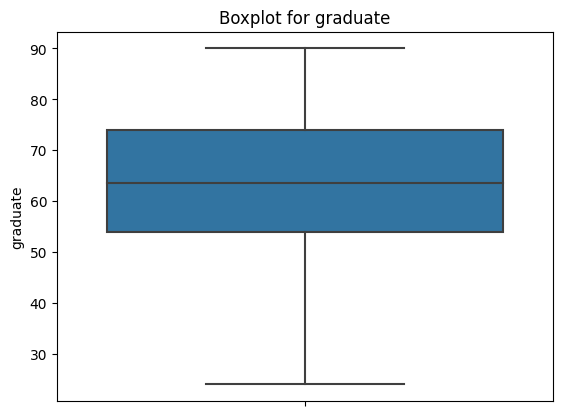

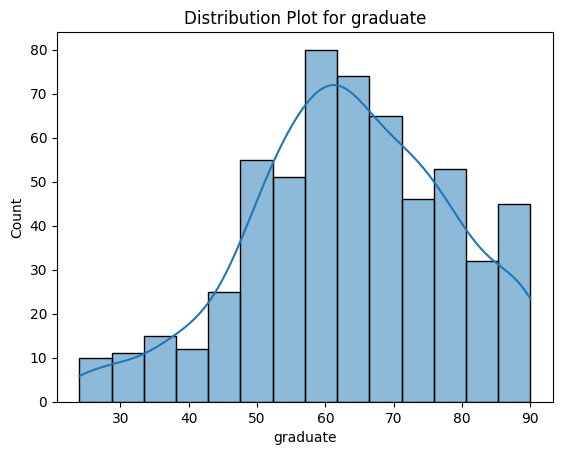

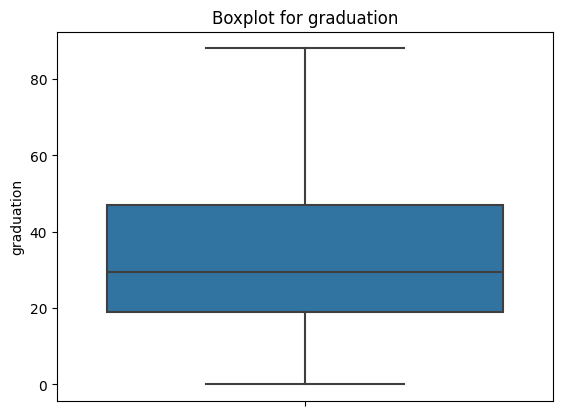

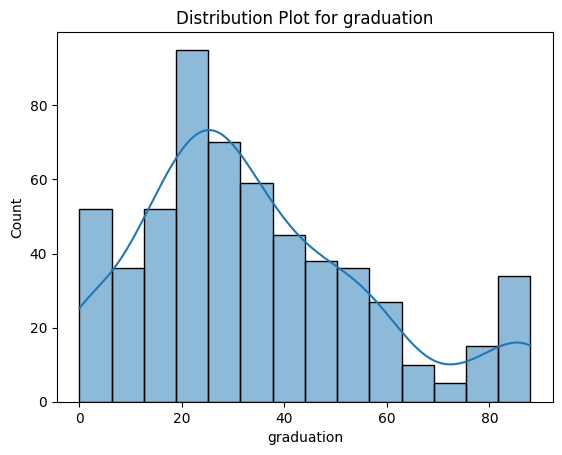

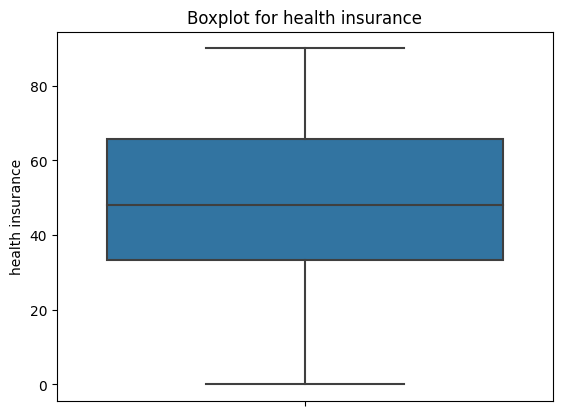

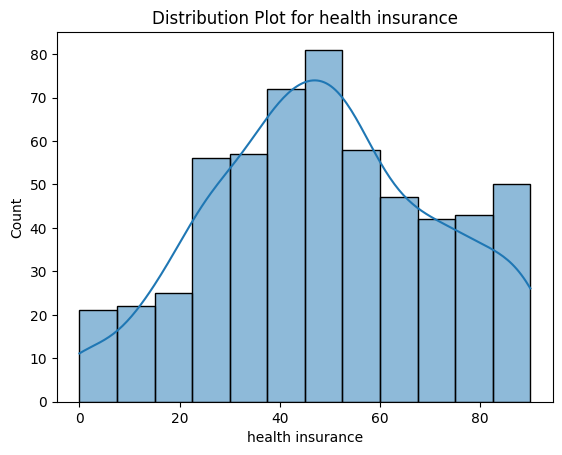

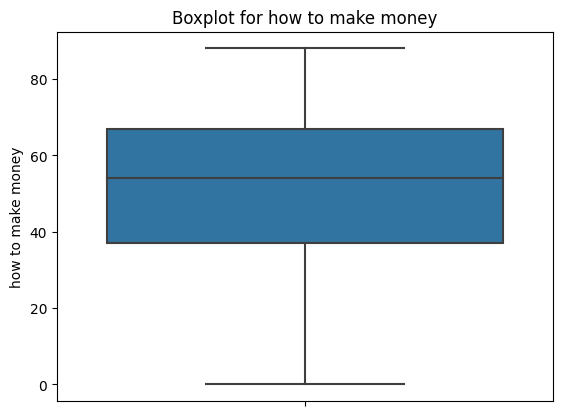

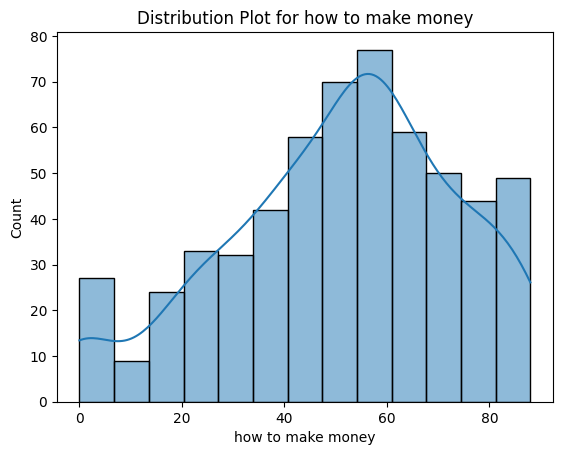

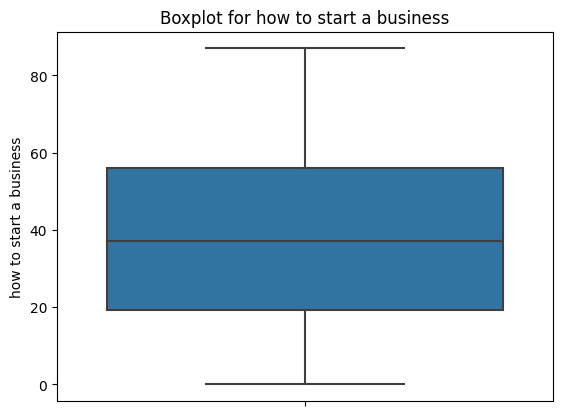

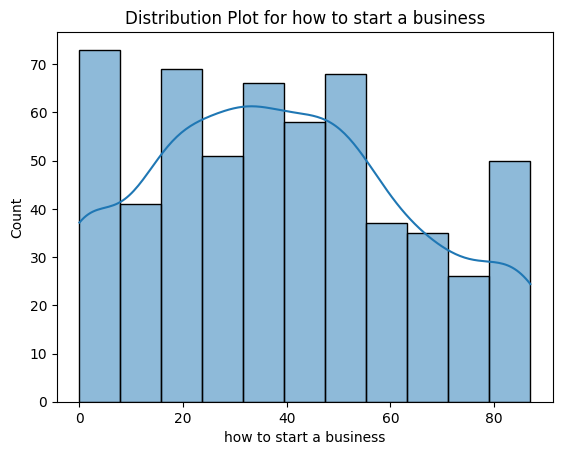

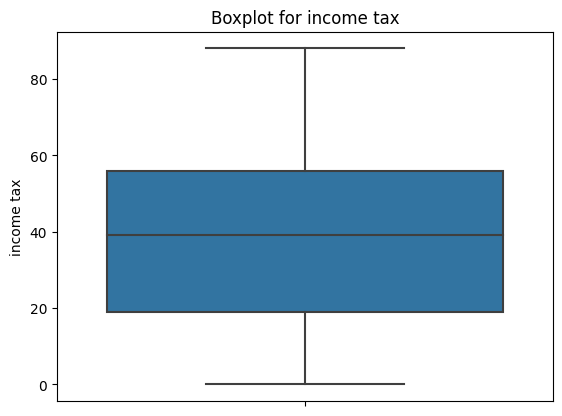

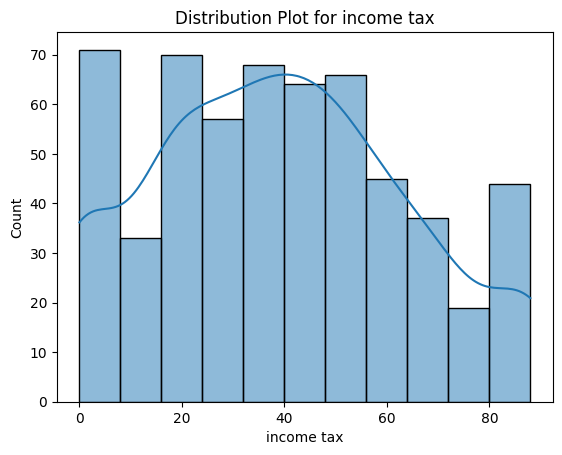

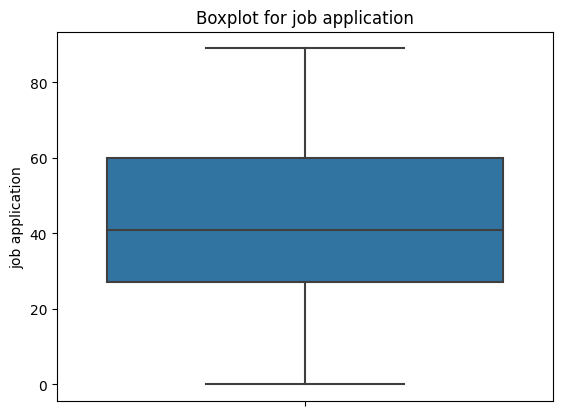

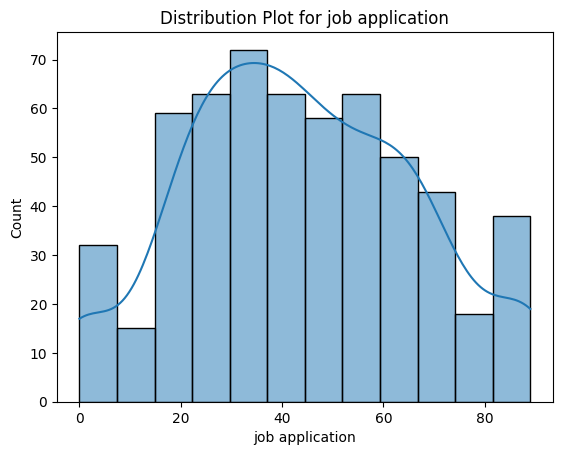

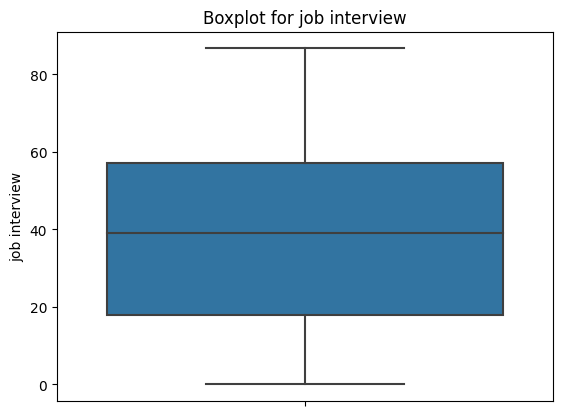

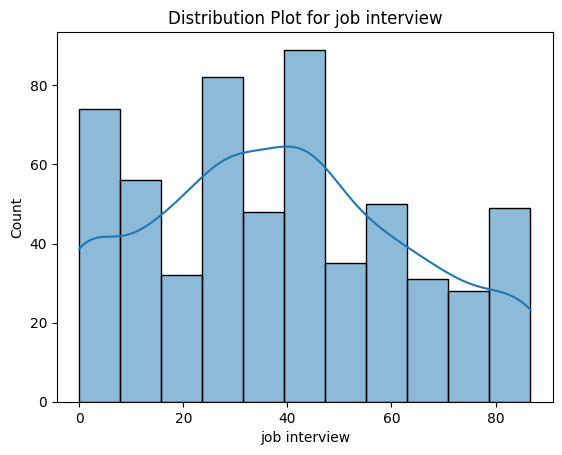

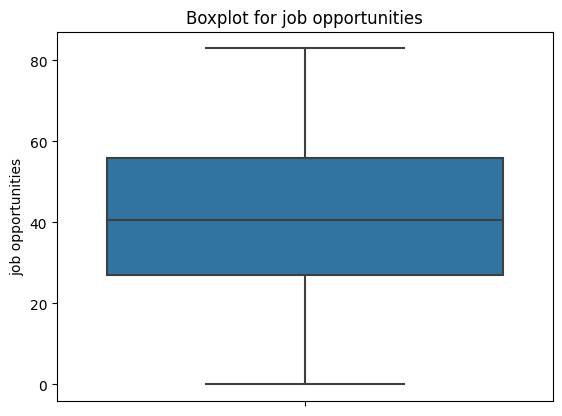

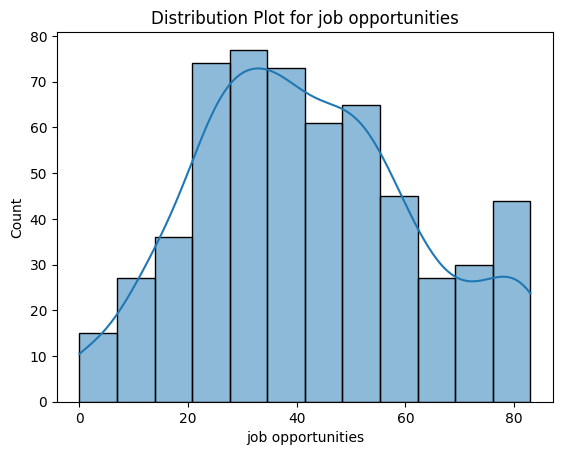

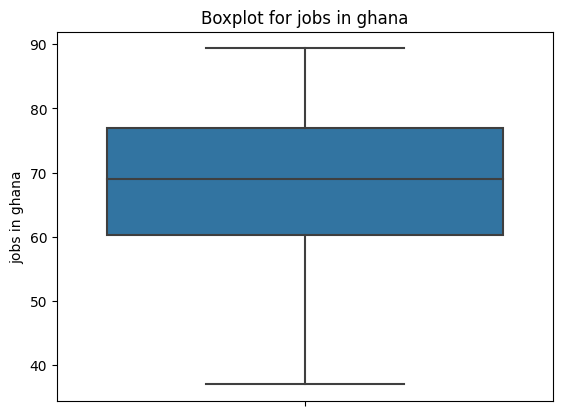

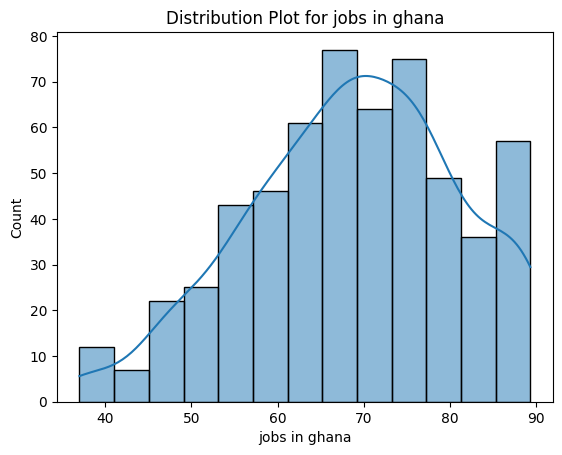

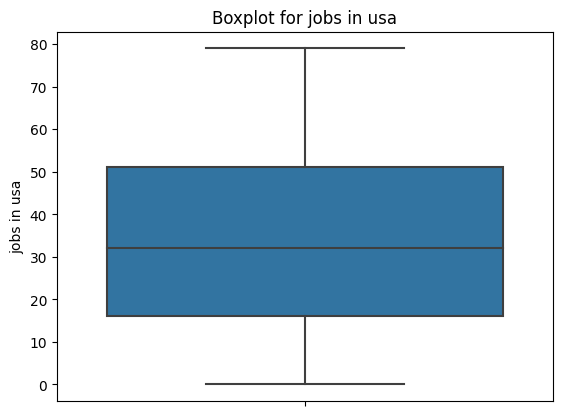

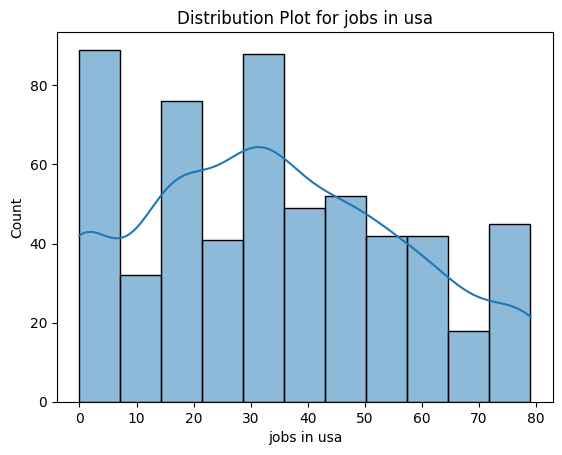

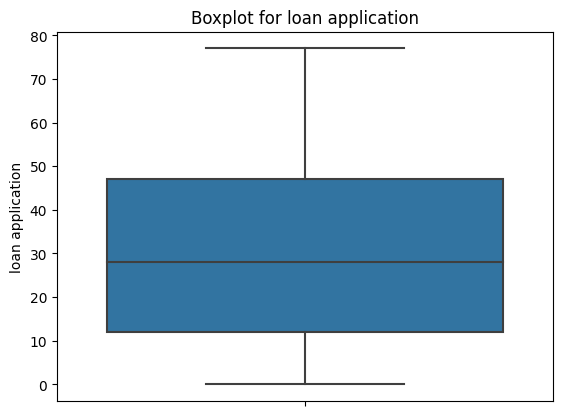

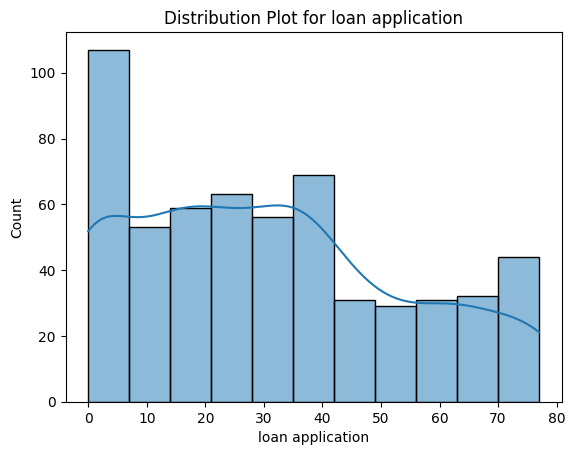

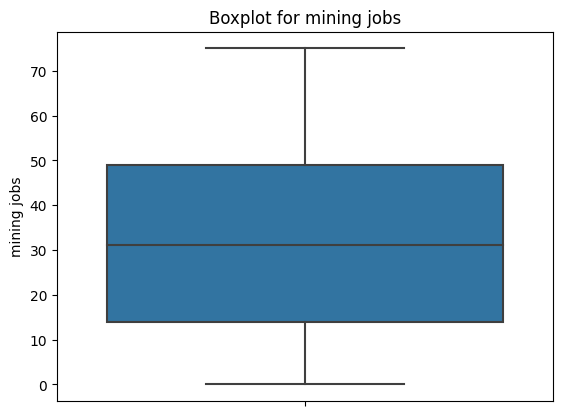

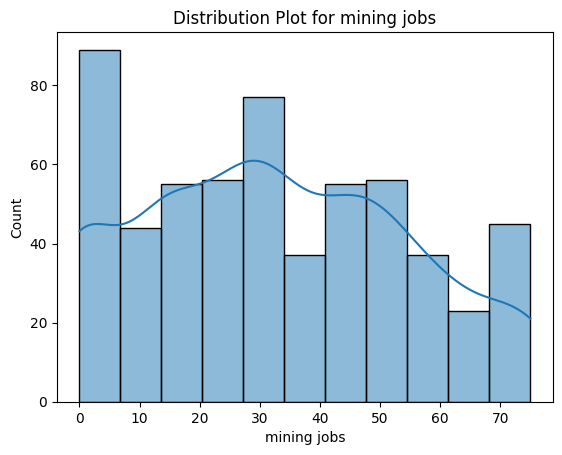

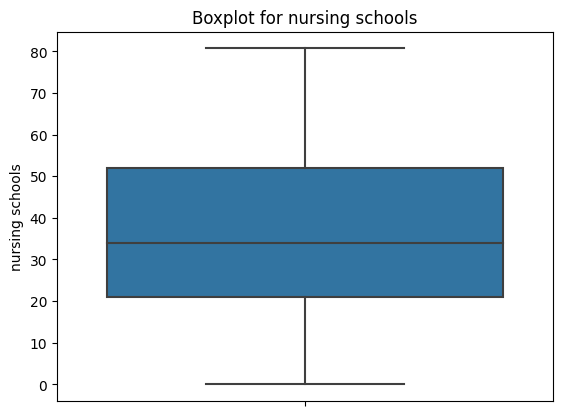

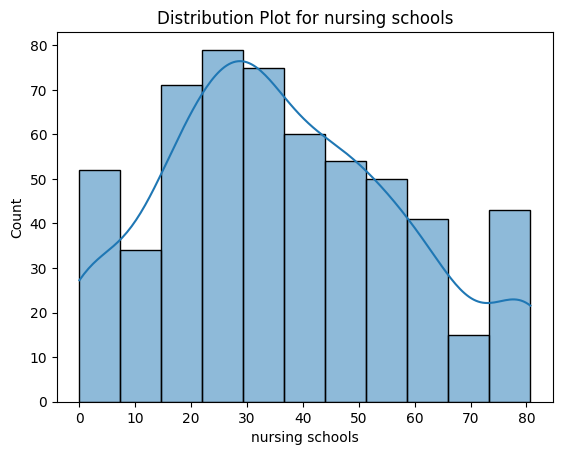

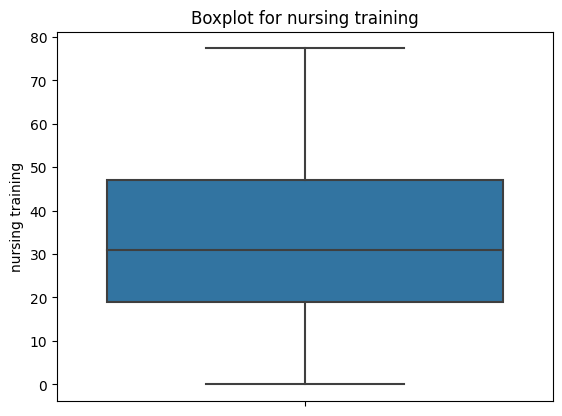

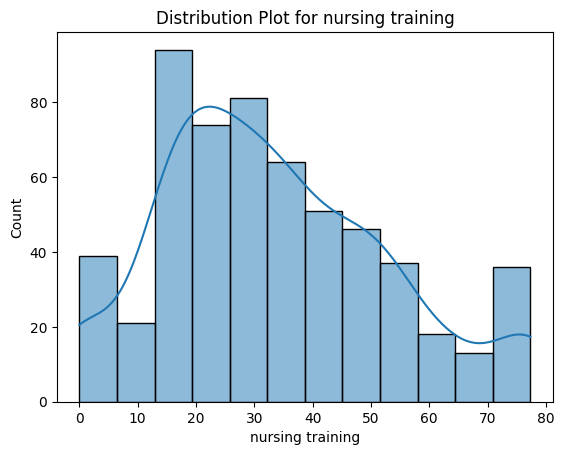

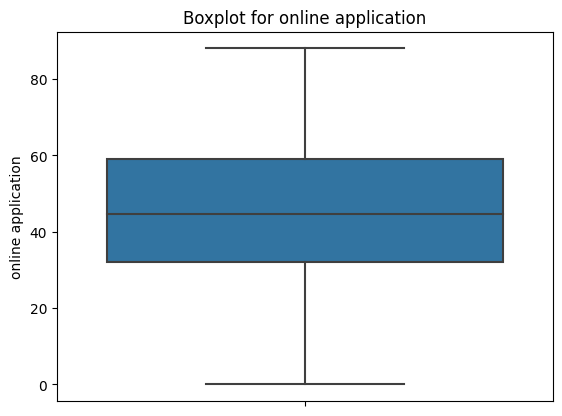

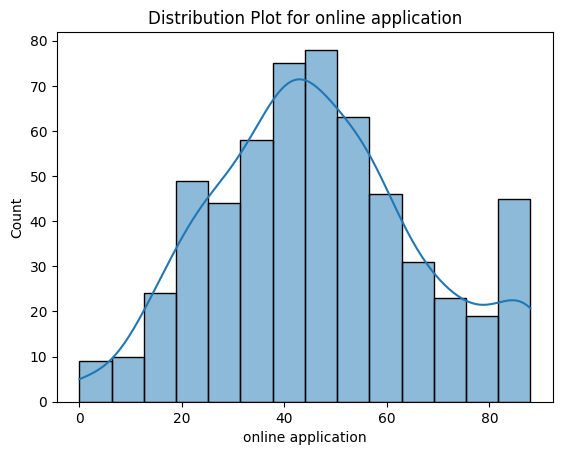

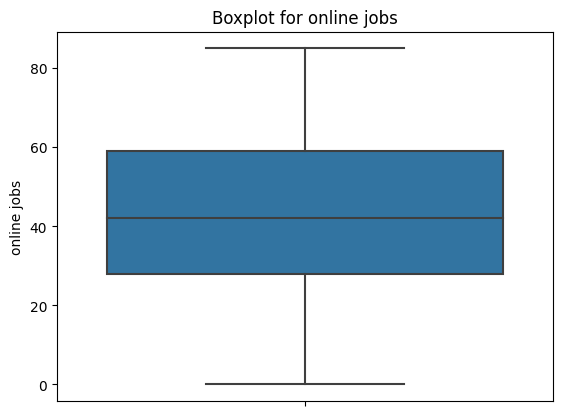

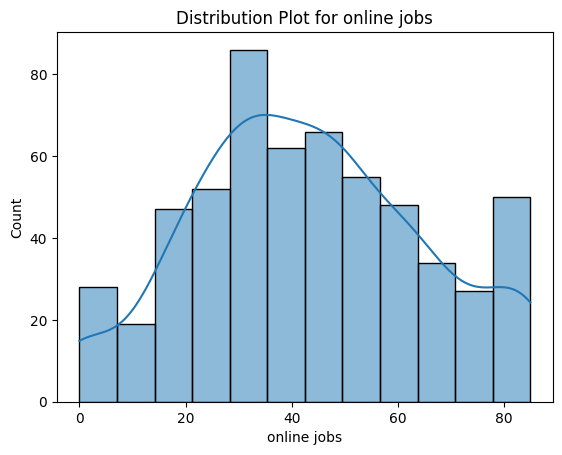

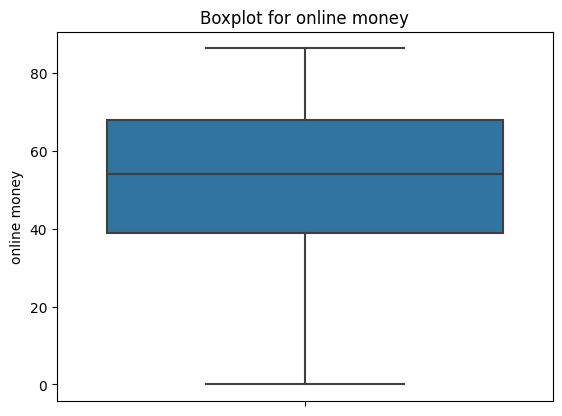

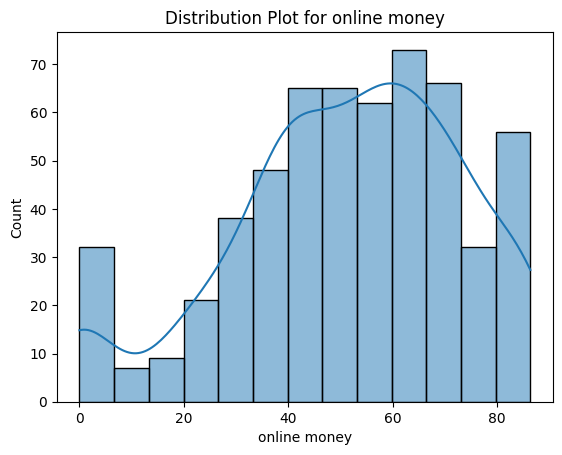

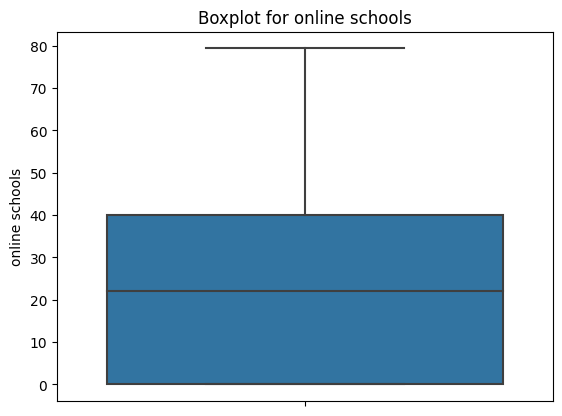

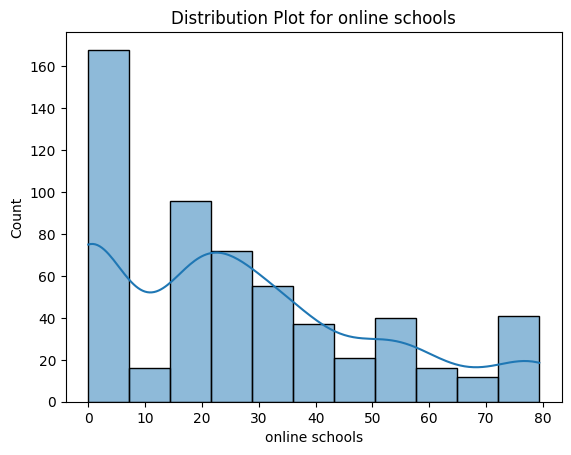

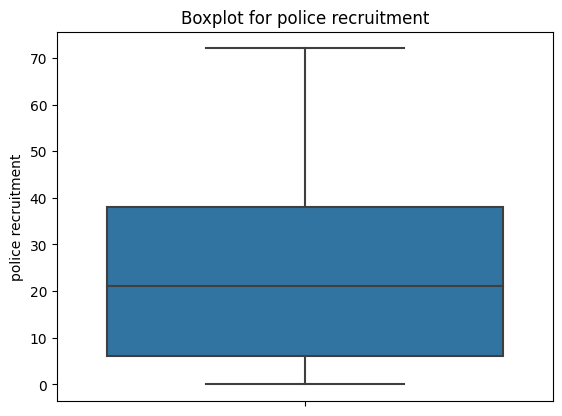

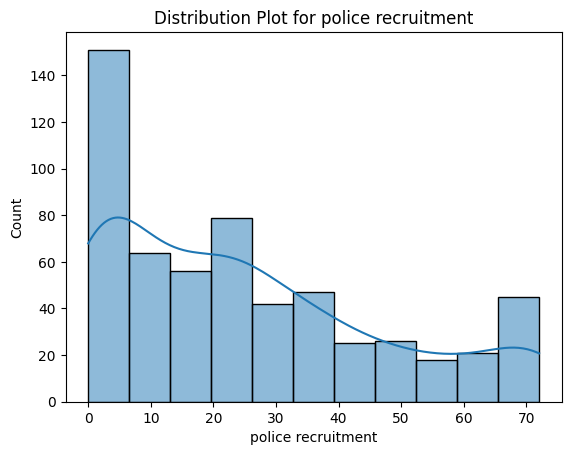

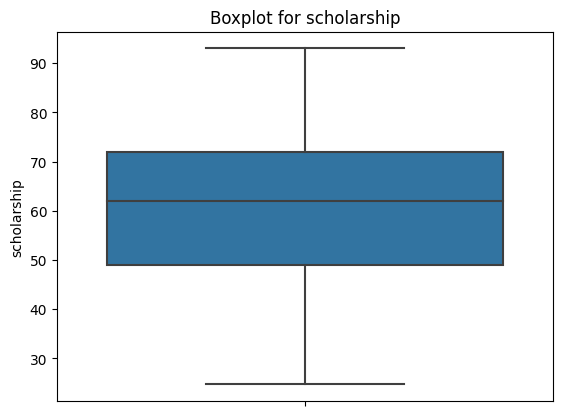

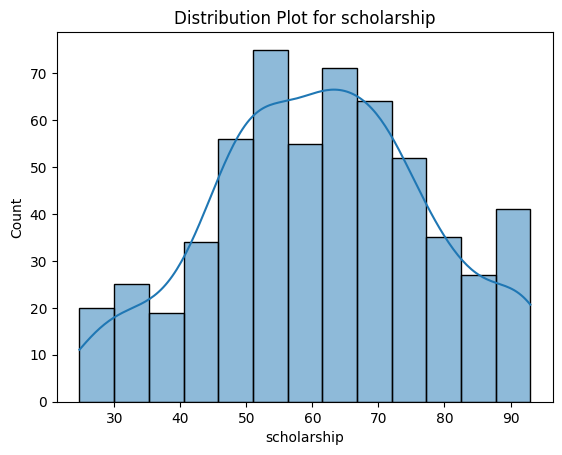

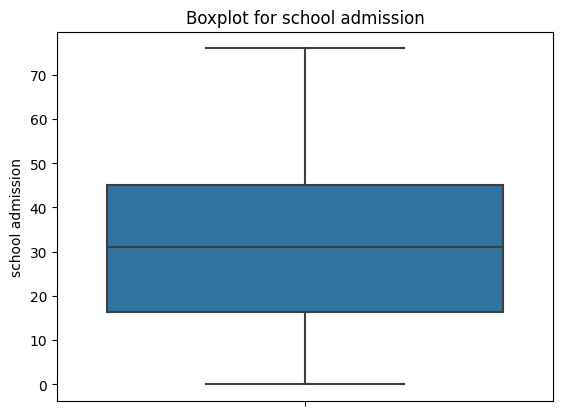

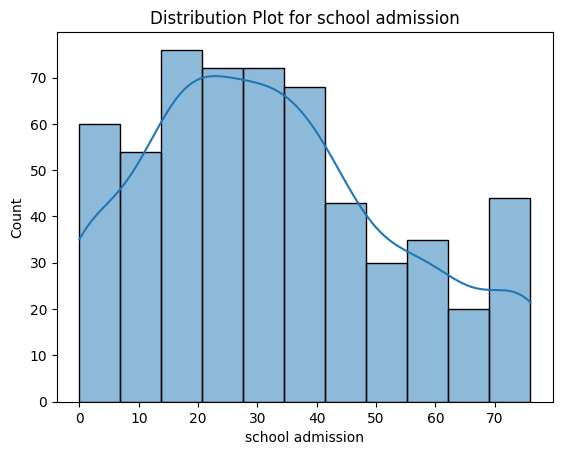

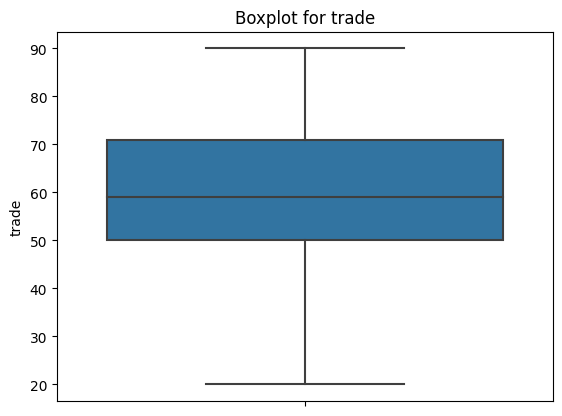

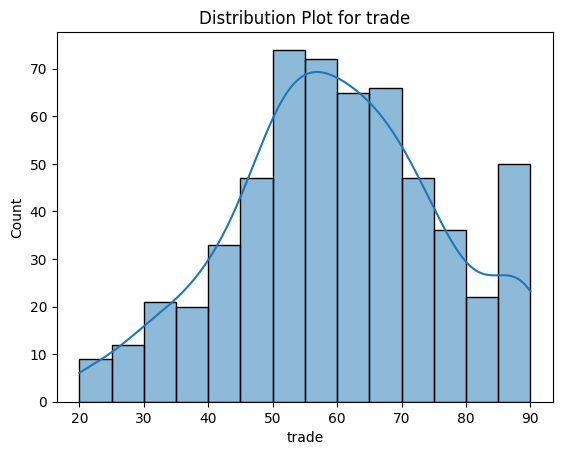

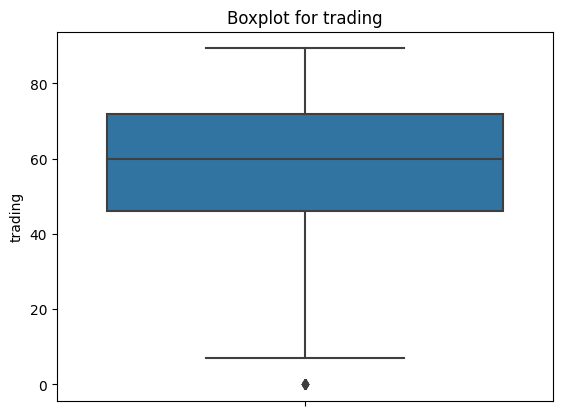

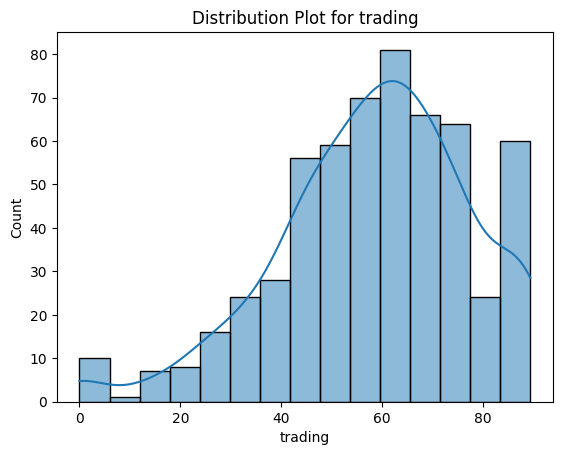

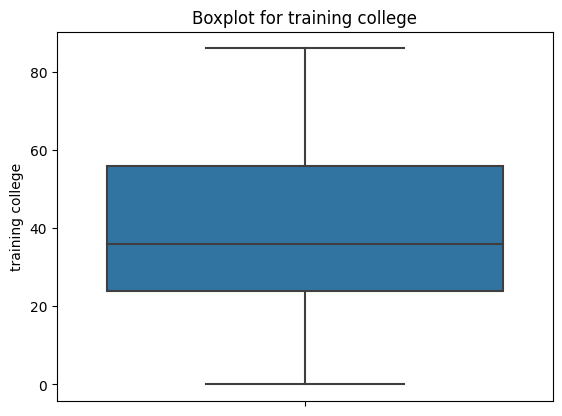

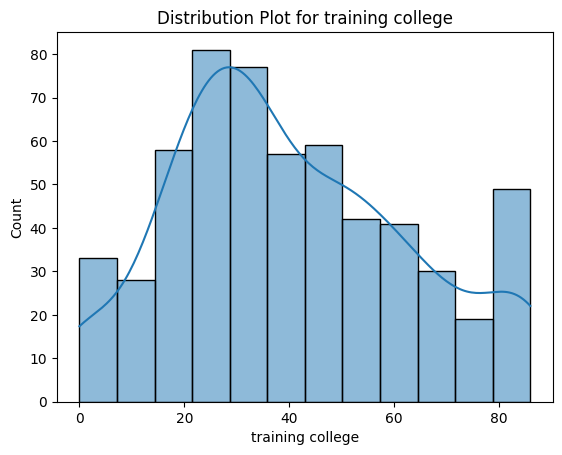

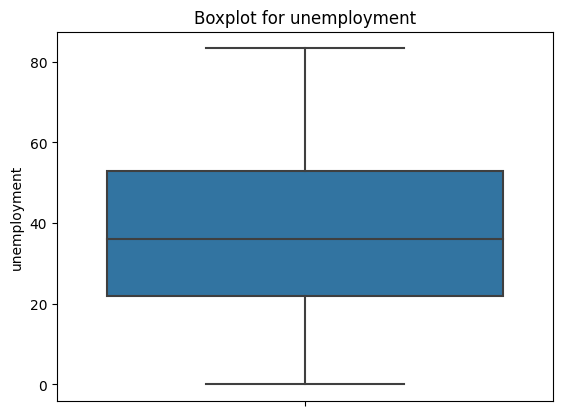

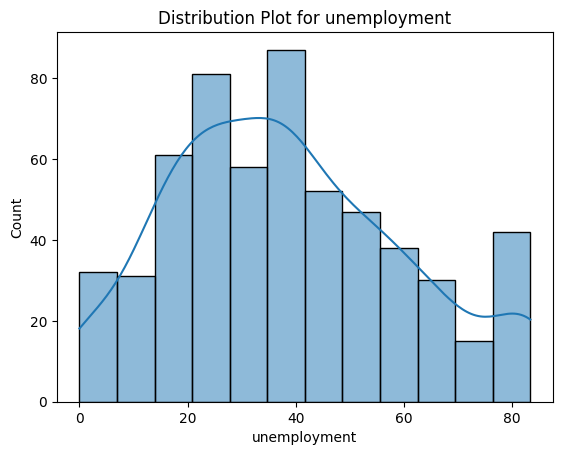

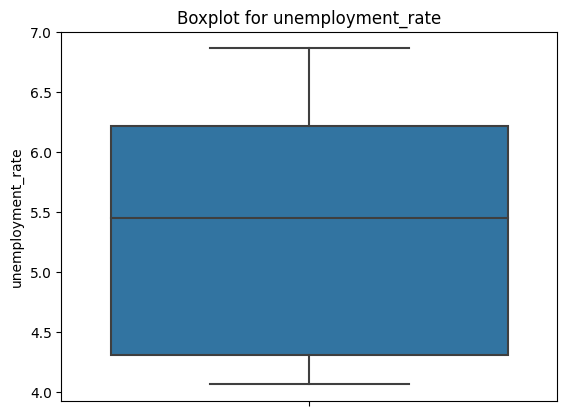

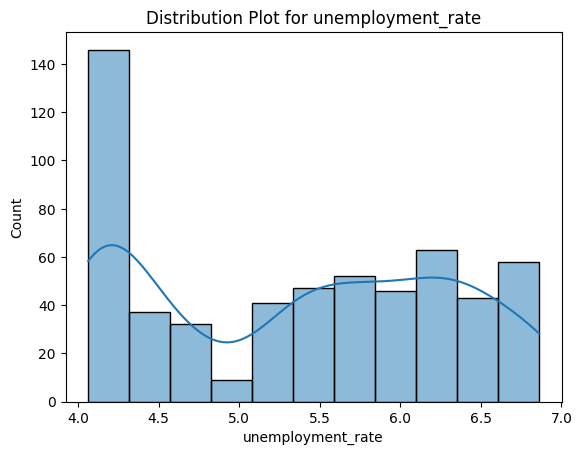

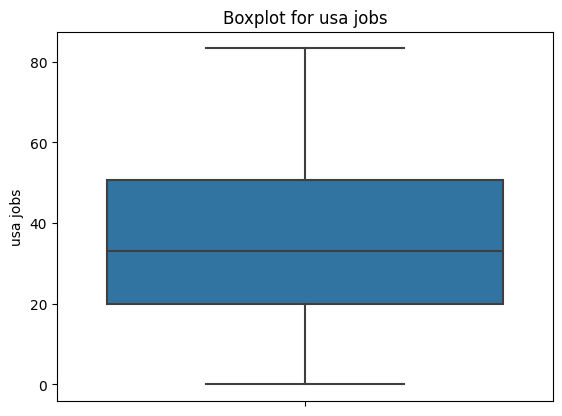

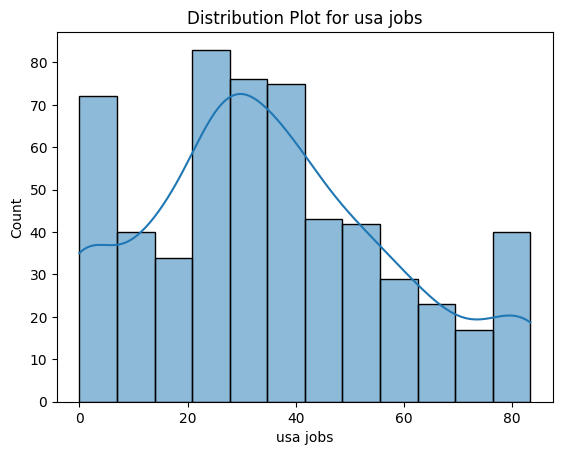

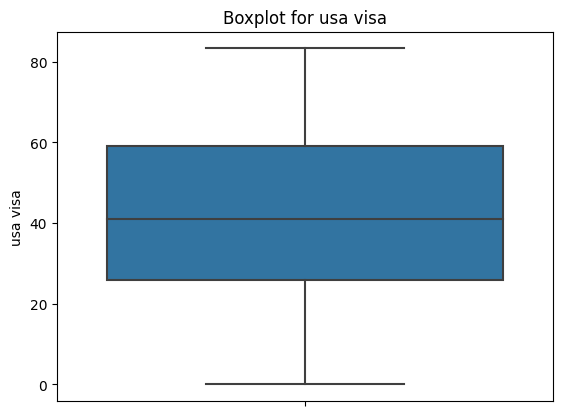

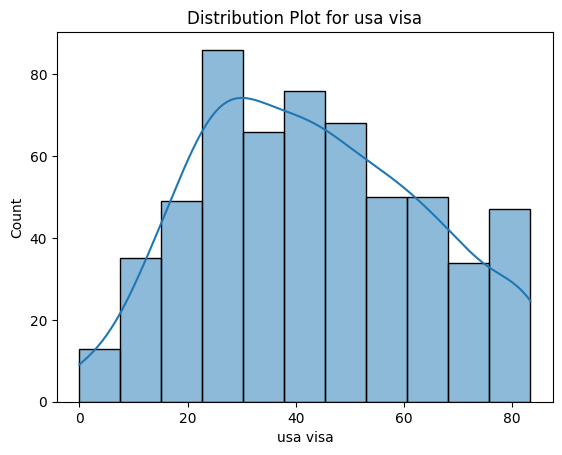

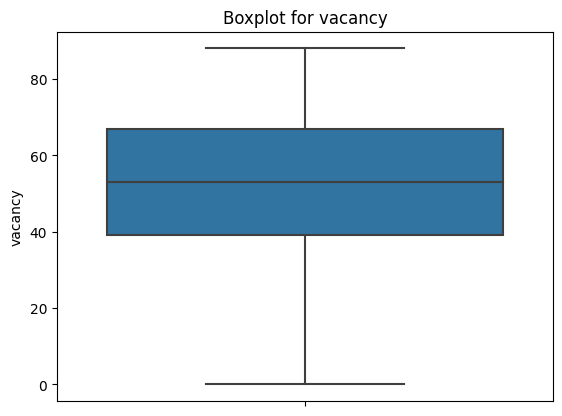

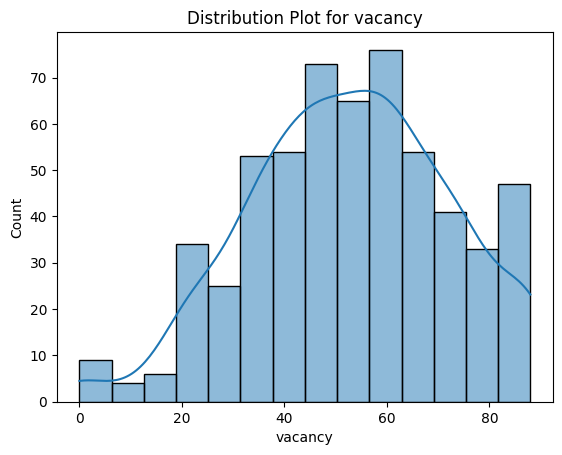

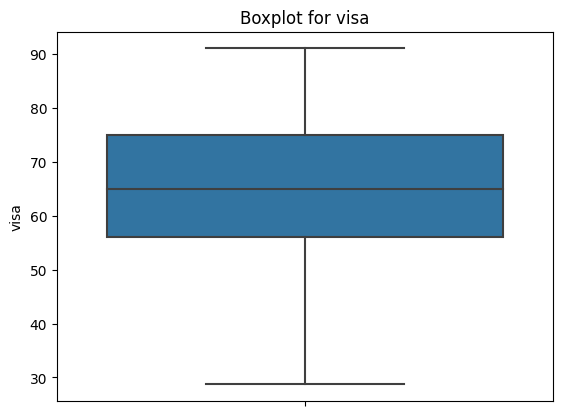

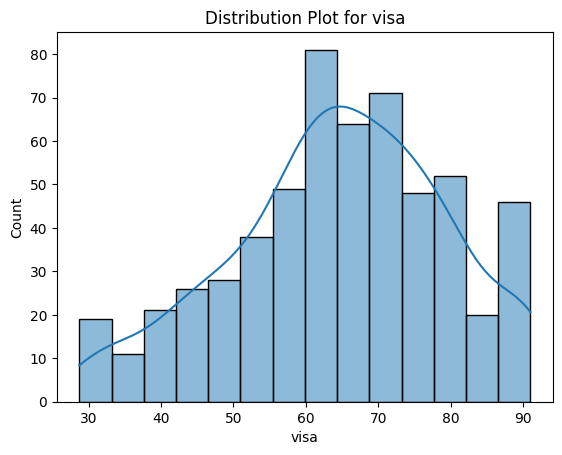

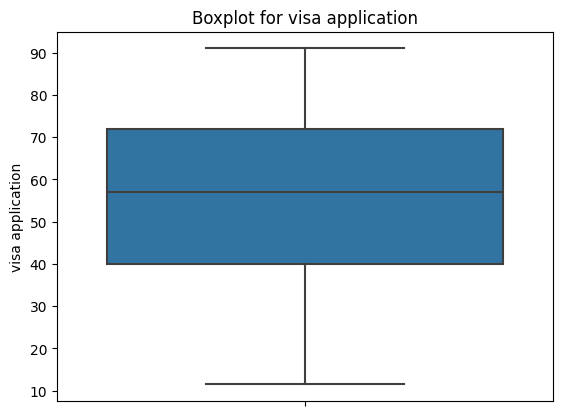

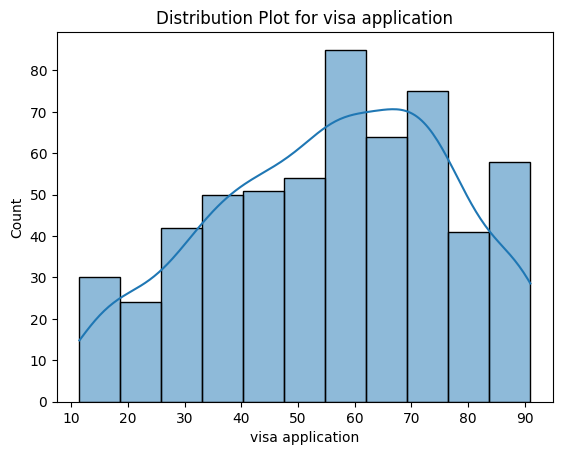

In [95]:
for column in cleaned_df.columns[1:]:
    plot_boxplot(cleaned_df, column)
    plot_distribution_plot(cleaned_df, column)

In [98]:
# Check for the column in the DataFrame
column_name = 'american lottery'
if column_name in cleaned_df.columns:
    # Drop the column if it exists
    cleaned_df = cleaned_df.drop(column_name, axis=1)
    print(cleaned_df.head())
else:
    print(f"Column '{column_name}' not found in the DataFrame.")


        week  Business opportunities  Curriculum vitae  Distance education  \
0   1/3/2010                    38.0                 0                 0.0   
1  1/10/2010                     0.0                34                38.0   
2  1/17/2010                     0.0                35                38.0   
3  1/24/2010                     0.0                64                70.0   
4  1/31/2010                    32.0                 0                 0.0   

   Exchange rate  Foreign Exchange  acceptance letter  \
0           14.0                 0                0.0   
1           28.0                 0                0.0   
2           71.0                39                0.0   
3           52.0                 0               45.0   
4           25.0                34                0.0   

   application for employment  application letter  career  ...  trade  \
0                           0                  51    80.0  ...     52   
1                          35             

In [100]:
# Calculate the correlation matrix
correlation_matrix = cleaned_df.corr()

# Filter the correlation matrix to include only correlations 0.5 and above
high_correlation_matrix = correlation_matrix[correlation_matrix >= 0.5]

# Exclude pairs of columns with the same names
filtered_high_correlation_matrix = high_correlation_matrix.mask(np.tril(np.ones(high_correlation_matrix.shape)).astype(np.bool))

# Use stack to get a Series with pairs of columns and their corresponding correlation
high_correlation_series = filtered_high_correlation_matrix.stack()

# Filter the Series to keep only pairs with correlation 0.5 and above
high_correlation_pairs = high_correlation_series[high_correlation_series >= 0.5]

# Print the pairs of columns and their correlations
print("Pairs of columns with correlation 0.5 and above (excluding same-name pairs):")
print(high_correlation_pairs)

Pairs of columns with correlation 0.5 and above (excluding same-name pairs):
application for employment  application letter    0.601147
                            employment            0.554680
                            employment letter     0.668504
application letter          employment letter     0.572583
                            job application       0.556070
employment                  employment letter     0.582550
ghana jobs                  jobs in ghana         0.932717
jobs in usa                 usa jobs              0.918907
nursing training            training college      0.675042
usa visa                    visa                  0.544884
visa                        visa application      0.653798
dtype: float64


<ipython-input-100-a288832239af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_df.corr()
<ipython-input-100-a288832239af>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filtered_high_correlation_matrix = high_correlation_matrix.mask(np.tril(np.ones(high_correlation_matrix.shape)).astype(np.bool))


Data Splitting

In [164]:
# Separate features and target
X = cleaned_df.drop(columns=['week', 'unemployment_rate'])
y = cleaned_df['unemployment_rate']

In [165]:
print(X.columns)

Index(['Business opportunities', 'Curriculum vitae', 'Distance education',
       'Exchange rate', 'Foreign Exchange', 'acceptance letter',
       'application for employment', 'application letter', 'career',
       'companies in ghana', 'cover letter', 'cv', 'distance learning',
       'employment letter', 'entrepreneur', 'ghana economy', 'ghana jobs',
       'graduate', 'graduation', 'health insurance', 'how to make money',
       'how to start a business', 'income tax', 'job application',
       'job interview', 'job opportunities', 'jobs in ghana', 'jobs in usa',
       'loan application', 'mining jobs', 'nursing schools',
       'nursing training', 'online application', 'online jobs', 'online money',
       'online schools', 'police recruitment', 'scholarship',
       'school admission', 'trade', 'trading', 'training college',
       'unemployment', 'unemployment_rate', 'usa jobs', 'usa visa', 'vacancy',
       'visa', 'visa application'],
      dtype='object')


In [166]:
print("Shape of x is: ", X.shape)
print("Shape of y is: ", y.shape)

Shape of x is:  (574, 49)
Shape of y is:  (574,)


In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# training set = 70%
# testing set = 30%

In [179]:
print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (401, 49)
x_test shape:  (173, 49)
y_train shape:  (401,)
y_test shape:  (173,)


In [180]:
scaler = StandardScaler()

In [181]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear Regression

In [182]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()


In [183]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [184]:
# Make predictions
predictions = lr_model.predict(X_test)

In [185]:
# Evaluate the model
mse_lr = metrics.mean_squared_error(y_test, predictions)

mae_lr = metrics.mean_absolute_error(y_test, predictions)

r2_lr = metrics.r2_score(y_test, predictions)

print(f'MAE: {mae_lr:.4f}')
print(f'MSE: {mse_lr:.4f}')
print(f'R2 score: {r2_lr:.4f}')

MAE: 11.0974
MSE: 208.9840
R2 score: 0.3273


In [186]:
# Calculate and print accuracy
accuracy = 1 - mae_lr/np.mean(y_test)
print(f'Linear Regression Accuracy: {accuracy:.4f}')

Linear Regression Accuracy: 0.8042


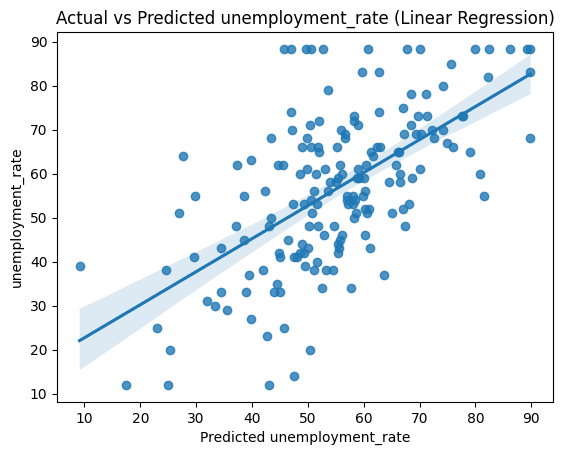

In [187]:
sns.regplot(x=predictions, y=y_test)
plt.xlabel("Predicted unemployment_rate")
plt.ylabel('unemployment_rate')
plt.title("Actual vs Predicted unemployment_rate (Linear Regression)")
plt.show()